# BT4012 Project Group 7

In [1]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 980.3 kB/s eta 0:00:00


In [1]:
# Import libraries
# import warnings
# warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import category_encoders as ce
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

pd.set_option('display.max_columns', 500)

## 1. Data Extraction

We extract and combine different raw data tables into train and test tables.

### 1.1 Data Importing

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# Import train and test data
beneficiary_test = pd.read_csv("/content/gdrive/MyDrive/BT4012/Data/Test_Beneficiarydata-1542969243754.csv")
inpatient_test = pd.read_csv("/content/gdrive/MyDrive/BT4012/Data/Test_Inpatientdata-1542969243754.csv")
outpatient_test = pd.read_csv("/content/gdrive/MyDrive/BT4012/Data/Test_Outpatientdata-1542969243754.csv")
test = pd.read_csv("/content/gdrive/MyDrive/BT4012/Data/Test-1542969243754.csv")

beneficiary_train = pd.read_csv("/content/gdrive/MyDrive/BT4012/Data/Train_Beneficiarydata-1542865627584.csv")
inpatient_train = pd.read_csv("/content/gdrive/MyDrive/BT4012/Data/Train_Inpatientdata-1542865627584.csv")
outpatient_train = pd.read_csv("/content/gdrive/MyDrive/BT4012/Data/Train_Outpatientdata-1542865627584.csv")
train = pd.read_csv("/content/gdrive/MyDrive/BT4012/Data/Train-1542865627584.csv")

print("Data Read")

Data Read


In [3]:
# Beneficiary train data
beneficiary_train.head(2)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,30,50


In [4]:
# Inpatient train data
inpatient_train.head(2)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN


In [5]:
# Outpatient train data
outpatient_train.head(2)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380


In [6]:
# Labeled train data
train.head(2)

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes


### 1.2 Data Merging


In [7]:
# create binary columns to indicate Inpatient status (1)
inpatient_train['is_inpatient'] = 1
outpatient_train['is_inpatient'] = 0

inpatient_test['is_inpatient'] = 1
outpatient_test['is_inpatient'] = 0

In [8]:
# concat inpatient and outpatient datasets to form a single patient column
patient_train = pd.concat([inpatient_train, outpatient_train])

patient_test = pd.concat([inpatient_test, outpatient_test])

In [9]:
# left join with beneficiary data on BeneID
patient_train = pd.merge(patient_train, beneficiary_train, how='left', on='BeneID')

patient_test = pd.merge(patient_test, beneficiary_test, how='left', on='BeneID')

In [10]:
# left join with label on Provider
patient_train = pd.merge(patient_train, train, how='left', on='Provider')

patient_test = pd.merge(patient_test, test, how='left', on='Provider')

In [11]:
print(f"Shape of train data: {patient_train.shape}")
print(f"Shape of test data: {patient_test.shape}")
# Test data is not labelled

Shape of train data: (558211, 56)
Shape of test data: (135392, 55)


## 2. Feature Engineering

We relabel, encode and aggregate data as there are too many feature columns in our dataset, some of which are not very meaningful in raw data form.

### 2.1 Data Clarification
- Changing binary boolean features to 0/1 values (all Chronic Conditions and RenalDiseaseIndicator)
- Replacing target label (`PotentialFraud`) to a binary value


In [12]:
# Replacing 2 with 0 for chronic conditions.

patient_train = patient_train.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                           'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2,
                           'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2,
                           'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2 }, 0)

patient_train = patient_train.replace({'RenalDiseaseIndicator': 'Y'}, 1)
patient_train = patient_train.replace({'RenalDiseaseIndicator': '0'}, 0)

patient_test = patient_test.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                           'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2,
                           'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2,
                           'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2 }, 0)

patient_test = patient_test.replace({'RenalDiseaseIndicator': 'Y'}, 1)
patient_test = patient_test.replace({'RenalDiseaseIndicator': '0'}, 0)

In [13]:
patient_train['PotentialFraud'] = patient_train['PotentialFraud'].replace({'Yes': 1, 'No': 0})

### 2.2 Feature Engineering
For Date Columns
- Create ClaimProcessedForDays from `ClaimStartDt` and `ClaimEndDt`
- Create Age, IsDead feature from `DOB` and `DOD`
- Create AdmitForDays from `AdmissionDT` and `DischargeDT`

In [14]:
date_cols= ['ClaimStartDt', 'ClaimEndDt', 'DOB', 'DOD', 'AdmissionDt', 'DischargeDt']
# Cast to Datetime Data Type
patient_train[date_cols] = patient_train[date_cols].apply(pd.to_datetime, format = '%Y-%m-%d', errors='ignore')
patient_test[date_cols] = patient_test[date_cols].apply(pd.to_datetime, format = '%Y-%m-%d', errors='ignore')

In [15]:
# For Train data
# Create 'ClaimProcessedForDays' indicating number of days the claim takes to process
patient_train['ClaimProcessedForDays'] = ((patient_train['ClaimEndDt'] - patient_train['ClaimStartDt']).dt.days)+1

# Create 'Age' indicating age of patient at latest day/DOD
patient_train['Age'] = round(((patient_train['DOD'] - patient_train['DOB']).dt.days)/365)
## For rows without DOD, we will calculate age of other benficiaries from the last DOD value (2009-12-01).
patient_train.Age.fillna(round(((pd.to_datetime('2009-12-01' , format = '%Y-%m-%d') - patient_train['DOB']).dt.days)/365), inplace=True)

# Create 'isDead' with flag 1 means Dead and 0 means not Dead
patient_train.loc[patient_train.DOD.isna(),'isDead']=0
patient_train.loc[patient_train.DOD.notna(),'isDead']=1

patient_train.loc[patient_train.DOD.isna(),'isDead']=0
patient_train.loc[patient_train.DOD.notna(),'isDead']=1

# Create 'AdmitForDays' indicating number of days patient was admitted in hospital (only for inpatient)
patient_train['AdmitForDays'] = ((patient_train['DischargeDt'] - patient_train['AdmissionDt']).dt.days)+1
patient_train['AdmitForDays'] = patient_train['AdmitForDays'].fillna(0) # for outpatient, default 0 days admitted


In [16]:
# For Test data
# Create 'ClaimProcessedForDays' indicating number of days the claim takes to process
patient_test['ClaimProcessedForDays'] = ((patient_test['ClaimEndDt'] - patient_test['ClaimStartDt']).dt.days)+1

# Create 'Age' indicating age of patient at latest day/DOD
patient_test['Age'] = round(((patient_test['DOD'] - patient_test['DOB']).dt.days)/365)
## For rows without DOD, we will calculate age of other benficiaries from the last DOD value (2009-12-01).
patient_test.Age.fillna(round(((pd.to_datetime('2009-12-01' , format = '%Y-%m-%d') - patient_test['DOB']).dt.days)/365), inplace=True)

# Create 'isDead' with flag 1 means Dead and 0 means not Dead
patient_test.loc[patient_test.DOD.isna(),'isDead']=0
patient_test.loc[patient_test.DOD.notna(),'isDead']=1

patient_test.loc[patient_test.DOD.isna(),'isDead']=0
patient_test.loc[patient_test.DOD.notna(),'isDead']=1

# Create 'AdmitForDays' indicating number of days patient was admitted in hospital (only for inpatient)
patient_test['AdmitForDays'] = ((patient_test['DischargeDt'] - patient_test['AdmissionDt']).dt.days)+1
patient_test['AdmitForDays'] = patient_test['AdmitForDays'].fillna(0) # for outpatient, default 0 days admitted

## Data Preprocessing


In [17]:
# trim 'ClmProcedureCode_6' column as it is completely filled with Nan values
trimmed_patient_train = patient_train.drop(columns=['ClmProcedureCode_6'])
trimmed_patient_test = patient_test.drop(columns=['ClmProcedureCode_6'])

### 3.1 Data Imputation
- Handling missing values in `DeductibleAmtPaid` and `DiagnosisGroupCode`

In [18]:
# For DeductibleAmtPaid, assign missing amount to be 0
trimmed_patient_train['DeductibleAmtPaid'].fillna(0, inplace=True)
trimmed_patient_test['DeductibleAmtPaid'].fillna(0, inplace=True)

In [19]:
# for DiagnosisGroupCode, assign a placeholder value of '000'
trimmed_patient_train['DiagnosisGroupCode'].fillna('000', inplace=True)
trimmed_patient_test['DiagnosisGroupCode'].fillna('000', inplace=True)

### 3.2 Categorical Encoding
- Categorical data (Race, Gender, State, County) are already categorically encoded

In [20]:
# Convert the columns to categorical data type
categorical_columns = ['Race', 'Gender', 'State', 'County']

trimmed_patient_train[categorical_columns] = trimmed_patient_train[categorical_columns].astype('category')
trimmed_patient_test[categorical_columns] = trimmed_patient_test[categorical_columns].astype('category')

### 3.3 Frequency Encoding
- Count encoding all the multi-label feature `diagnosis_codes`, `procedure_codes`, `physician_codes`
- All Nan values are encoded 0

In [21]:
# List of codes columns - for physicians, diagnosis and procedure
freq_encoding_cols = {
"Physician Codes" : ['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician'],

"Diagnosis Codes" : ['ClmAdmitDiagnosisCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
                   'ClmDiagnosisCode_4','ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7',
                   'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9','ClmDiagnosisCode_10'],

"Procedure Codes" : ['ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
                   'ClmProcedureCode_5'],

"Diagnosis Group Codes" : ['DiagnosisGroupCode']
}

In [22]:
# CountEncode each code group columns (Both Train and Test)
for k, code_cols in freq_encoding_cols.items():
    ec = ce.CountEncoder()
    # fit Encoder on stacked train data of each code group
    ec = ec.fit(trimmed_patient_train[code_cols].stack(dropna=True).astype('O'))
    # transform each column of the code group
    for col in code_cols:
        trimmed_patient_train[col + "_ce"] = ec.transform(trimmed_patient_train[col].rename(0))
        trimmed_patient_train[col + "_ce"] = trimmed_patient_train[col + "_ce"].astype('category')
        trimmed_patient_test[col + "_ce"] = ec.transform(trimmed_patient_test[col].rename(0))
        trimmed_patient_test[col + "_ce"] = trimmed_patient_test[col + "_ce"].astype('category')
    print(f"Complete encoding for {k}")

Complete encoding for Physician Codes
Complete encoding for Diagnosis Codes
Complete encoding for Procedure Codes
Complete encoding for Diagnosis Group Codes


## 4. Exploratory Data Analysis

We explore `PotentialFraud` Proportion of different Features in Train data.

### 4.1 Overall Proportion

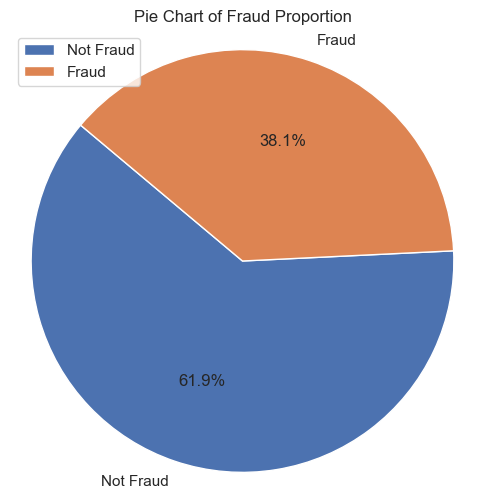

In [ ]:
#@title Distribution of Fraud and non-Fraud

fraud_counts = patient_train['PotentialFraud'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(fraud_counts, labels=['Not Fraud', 'Fraud'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

plt.title('Pie Chart of Fraud Proportion')
plt.legend()
plt.show()

### 4.2 Proportion by Categorical Features

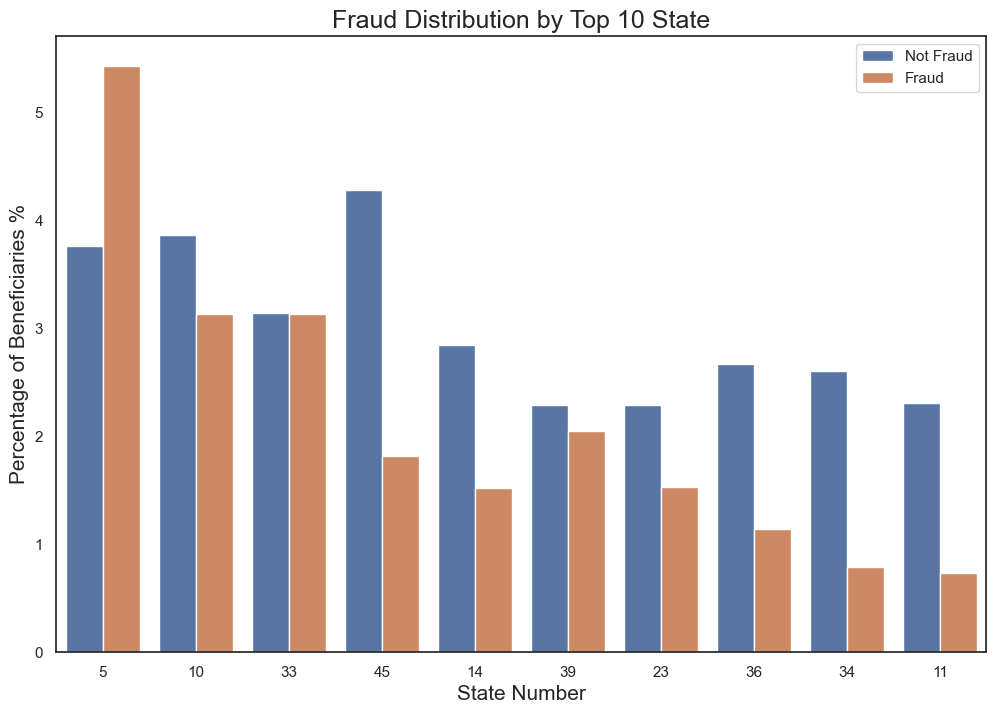

In [ ]:
#@title Distribution of Frauds across top 10 States
sns.set(rc={'figure.figsize':(12,8)},style='white')
sns.countplot(x='State',hue='PotentialFraud',data=patient_train, stat='percent'
              ,order=patient_train['State'].value_counts().iloc[:10].index)

plt.title("Fraud Distribution by Top 10 State",fontsize=18)
plt.xlabel("State Number",fontsize=15)
plt.ylabel("Percentage of Beneficiaries %",fontsize=15)
plt.legend(labels=['Not Fraud', 'Fraud'])
plt.show()

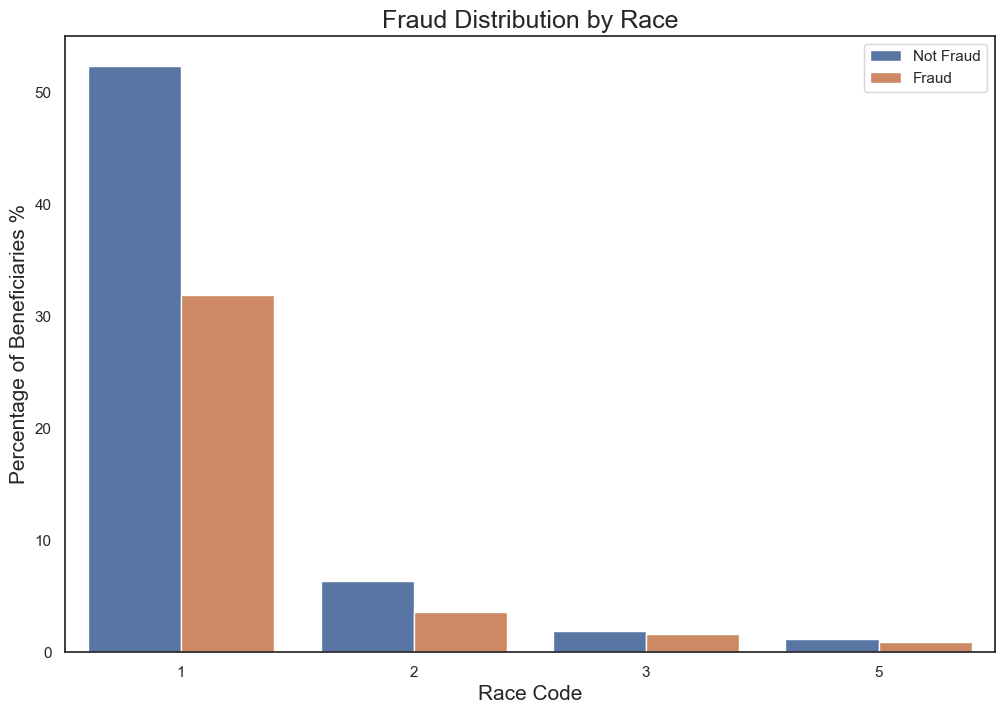

In [ ]:
#@title Distribution of Race-wise beneficiaries
sns.set(rc={'figure.figsize':(12,8)},style='white')
sns.countplot(x='Race',hue='PotentialFraud',data=patient_train, stat='percent'
              ,order=patient_train['Race'].value_counts().iloc[:10].index)

plt.title("Fraud Distribution by Race",fontsize=18)
plt.xlabel("Race Code",fontsize=15)
plt.ylabel("Percentage of Beneficiaries %",fontsize=15)
plt.legend(labels=['Not Fraud', 'Fraud'])
plt.show()


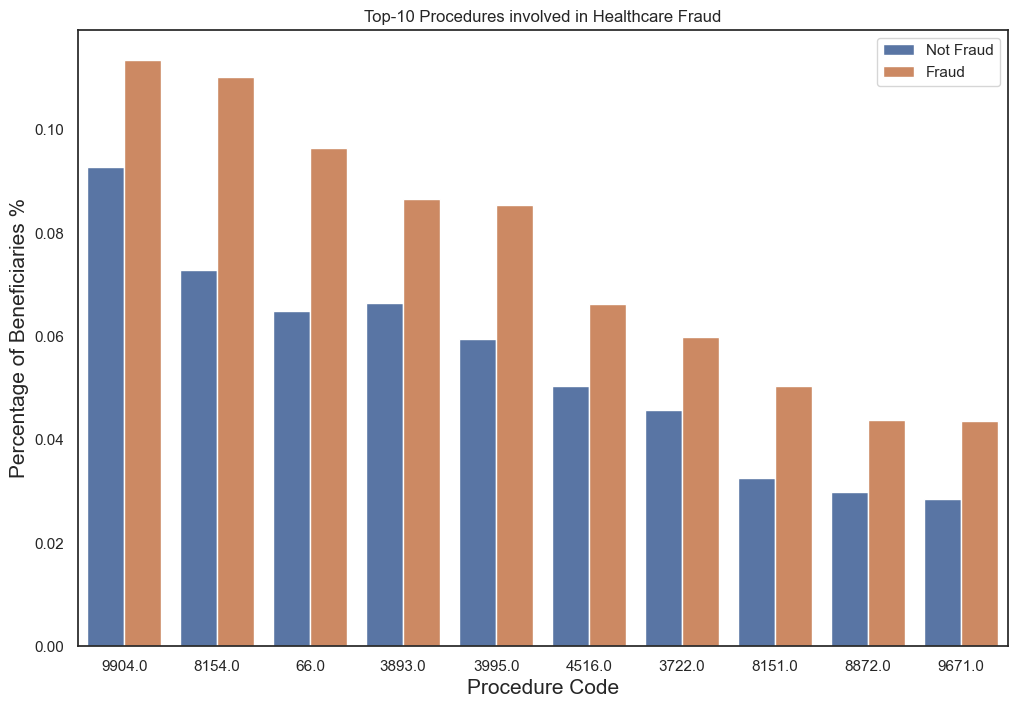

In [ ]:
#@title Distribution of Fraud across top 10 Procedures

sns.set(rc={'figure.figsize':(12,8)},style='white')

ax=sns.countplot(x='ClmProcedureCode_1',hue='PotentialFraud',data=patient_train, stat='percent'
              ,order=patient_train.ClmProcedureCode_1.value_counts().iloc[:10].index)

plt.title('Top-10 Procedures involved in Healthcare Fraud')
plt.xlabel("Procedure Code",fontsize=15)
plt.ylabel("Percentage of Beneficiaries %",fontsize=15)
plt.legend(labels=['Not Fraud', 'Fraud'])

plt.show()


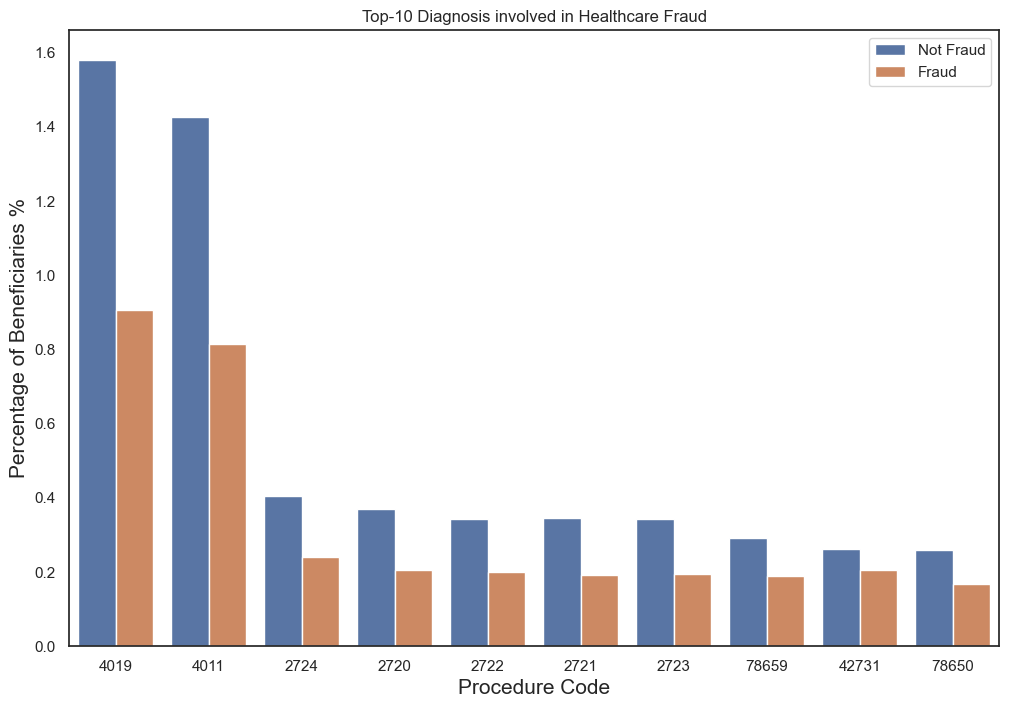

In [ ]:
#@title Distribution of Fraud across top 10 Diagnosis

sns.set(rc={'figure.figsize':(12,8)},style='white')

ax=sns.countplot(x='ClmDiagnosisCode_1',hue='PotentialFraud',data=patient_train, stat='percent'
              ,order=patient_train.ClmDiagnosisCode_1.value_counts().iloc[:10].index)

plt.title('Top-10 Diagnosis involved in Healthcare Fraud')
plt.xlabel("Procedure Code",fontsize=15)
plt.ylabel("Percentage of Beneficiaries %",fontsize=15)
plt.legend(labels=['Not Fraud', 'Fraud'])

plt.show()

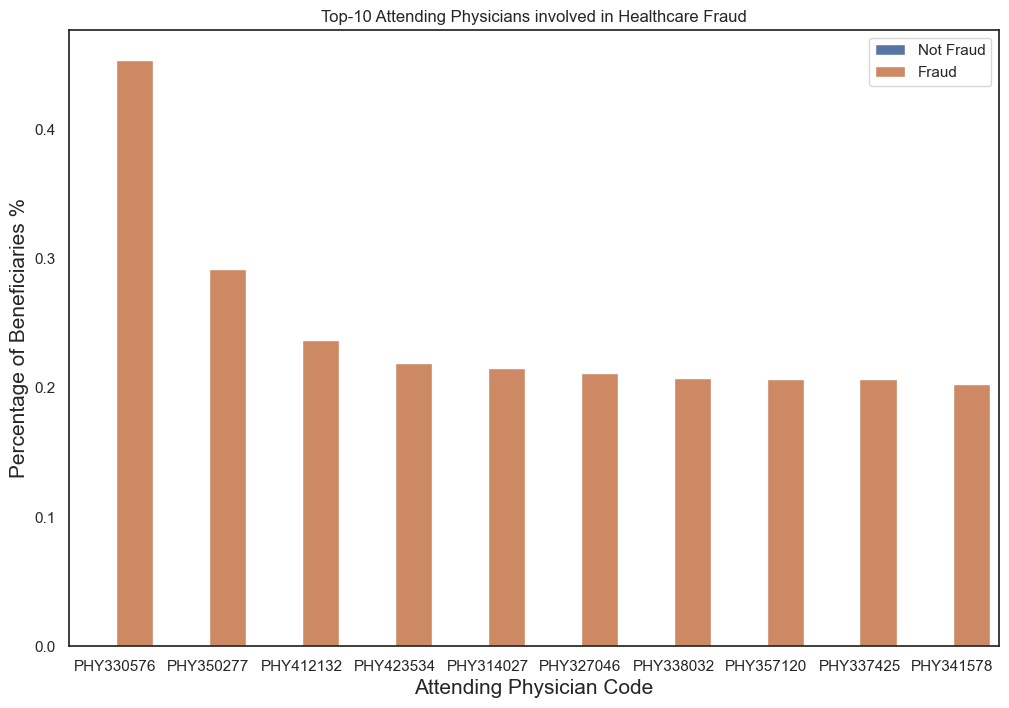

In [ ]:
#@title Distribution of Fraud across Attending Physicians

sns.set(rc={'figure.figsize':(12,8)},style='white')

ax=sns.countplot(x='AttendingPhysician',hue='PotentialFraud',data=patient_train, stat='percent'
              ,order=patient_train.AttendingPhysician.value_counts().iloc[:10].index)

plt.title('Top-10 Attending Physicians involved in Healthcare Fraud')
plt.xlabel("Attending Physician Code",fontsize=15)
plt.ylabel("Percentage of Beneficiaries %",fontsize=15)
plt.legend(labels=['Not Fraud', 'Fraud'])

plt.show()

### 4.3 Distribution of Numerical Features

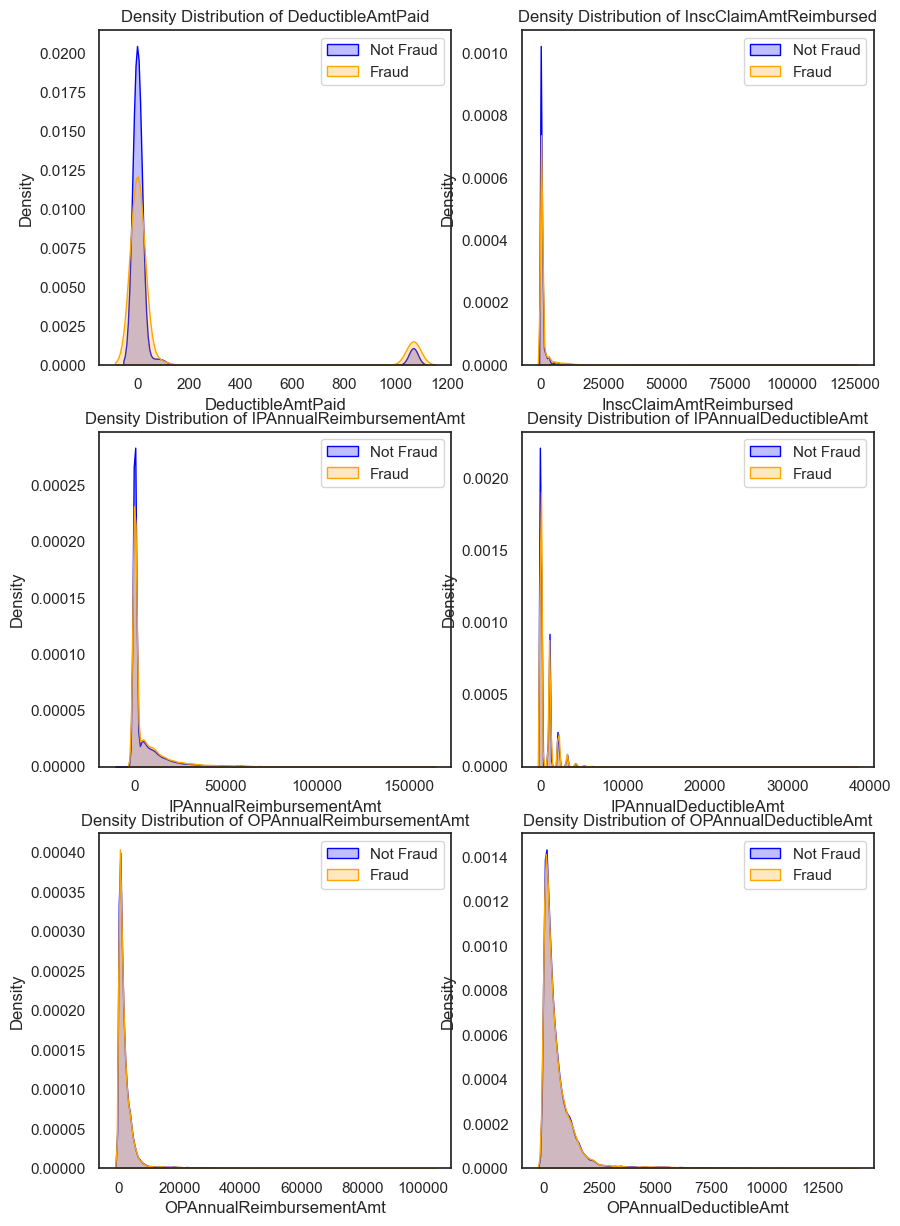

In [ ]:
#@title Density Distribution of Numerical features
selected_col =  ['DeductibleAmtPaid', 'InscClaimAmtReimbursed', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
            'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt']

num_rows = (len(selected_col) + 3) // 2  # Adjust based on the desired layout
num_cols = 2

plt.figure(figsize=(10, 5*num_rows))
for idx, column in enumerate(selected_col, start=1):
    plt.subplot(num_rows, num_cols, idx)
    sns.kdeplot(patient_train[patient_train['PotentialFraud'] == 0][column], fill=True, color="blue", label="Not Fraud")
    sns.kdeplot(patient_train[patient_train['PotentialFraud'] == 1][column], fill=True, color="orange", label="Fraud")
    plt.title(f"Density Distribution of {column}")
    plt.legend()

plt.show()

#### Missing OperatingPhysician --  check that all missing rows are associated with outpatient

Assumption: Patients who dont stay in the hospital do not require surgery, hence is Missing at Random

In [ ]:
patient_train[patient_train['OperatingPhysician'].isna()]['is_inpatient'].unique()

array([1, 0], dtype=int64)

Operating Physicians are present for both inpatient and outpatient. Maybe Operating Physicians can operate on outpatients too. Check distribution of missing vs non missing Operating Physicians on inpatient vs outpatients

<Axes: xlabel='OperatingPhysician_temp', ylabel='count'>

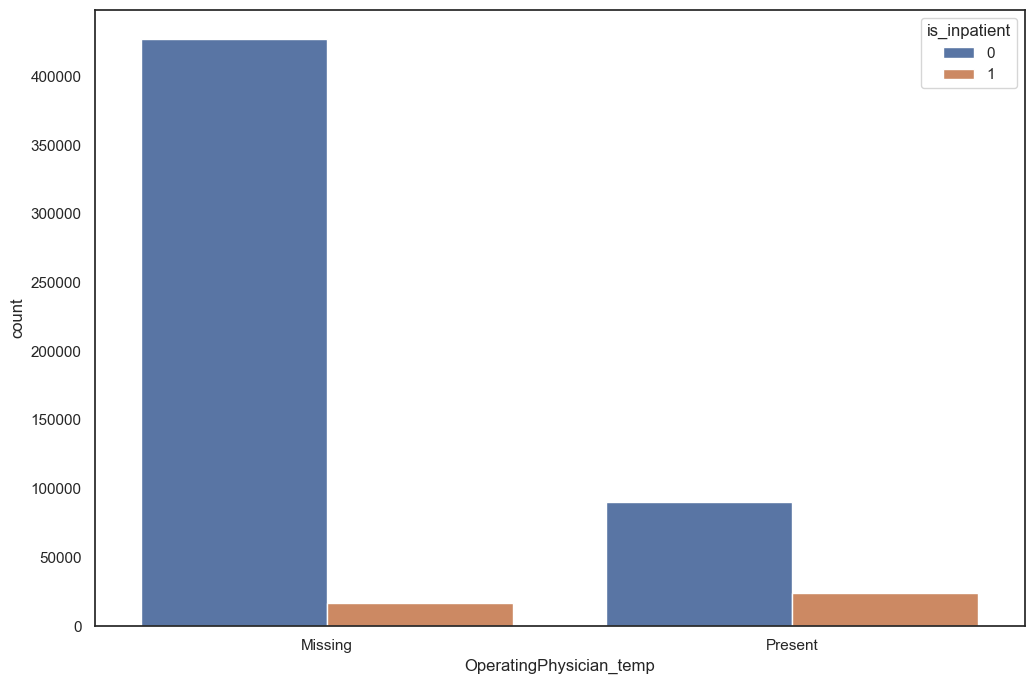

In [ ]:
patient_train['OperatingPhysician_temp'] = patient_train['OperatingPhysician'].apply(lambda x: "Missing" if pd.isnull(x) else "Present")
sns.countplot(data=patient_train, x='OperatingPhysician_temp', hue='is_inpatient')

## 5. Data Uploading

### 5.1 Obtain relevant columns
- Keep newly engineered features, categorical features, encoded features and scaled numerical features
- Ignore date columns, codes columns
- Upload to X_train, y_train and X_test json file

In [23]:
relevant_cols = ['BeneID', 'ClaimID', 'Provider',
       'InscClaimAmtReimbursed', 'DeductibleAmtPaid',
       'is_inpatient', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt', 'Age', 'isDead',
       'AdmitForDays', 'ClaimProcessedForDays', 'AttendingPhysician_ce',
       'OperatingPhysician_ce', 'OtherPhysician_ce',
       'ClmAdmitDiagnosisCode_ce', 'ClmDiagnosisCode_1_ce',
       'ClmDiagnosisCode_2_ce', 'ClmDiagnosisCode_3_ce',
       'ClmDiagnosisCode_4_ce', 'ClmDiagnosisCode_5_ce',
       'ClmDiagnosisCode_6_ce', 'ClmDiagnosisCode_7_ce',
       'ClmDiagnosisCode_8_ce', 'ClmDiagnosisCode_9_ce',
       'ClmDiagnosisCode_10_ce', 'ClmProcedureCode_1_ce',
       'ClmProcedureCode_2_ce', 'ClmProcedureCode_3_ce',
       'ClmProcedureCode_4_ce', 'ClmProcedureCode_5_ce', 'DiagnosisGroupCode_ce']
target_col = ['BeneID', 'Provider', 'PotentialFraud']

In [24]:
# X_train, y_train, and X_test
X_train = trimmed_patient_train[relevant_cols]
y_train = trimmed_patient_train[target_col]
X_test = trimmed_patient_test[relevant_cols]

num_rows = X_train.shape[0]
split_index = num_rows // 2

# Split the DataFrame into two equal parts
X_train1 = X_train.iloc[:split_index]
X_train2 = X_train.iloc[split_index:]

# Save X_train, y_train, and X_test to csv files
X_train1.to_csv('X_train1.csv', index=False)
X_train2.to_csv('X_train2.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)

In [25]:
len(X_train1['Provider']) == len(X_train1['Provider'].unique())

False

## 6. Automated Feature Engineering
Now that we have cleaned and preprocessed our data, we can engineer features relevant to predicting fraudulent providers. Instead of generating it manually, we will make use of a technique known as automated feature engineering to help us generate more features. In particular, we will utilise deep feature synthesis from the featuretools library to help us with this process. Deep feature synthesis applies mathematical operations on existing features and stacks them together to create new features. Subsequently, we can test and see the effectiveness of these new features in helping us to predict medicare fraud.

In [26]:
# Please uncomment and run this line if you don't have featuretools installed
!pip install featuretools

import featuretools as ft

### 6.1 Import Preprocessed Datasets

**Note: The X_test.csv does not contain labels, while the X_train1.csv and X_train2.csv contains labels.**

Since we are going to be creating supervised and unsupervised models, it is important to note that we can only use the X_train1.csv and X_train2.csv to train and test our supervised models.

Hence to avoid confusion on the nature of the dataset when importing, we will import X_train1.csv, X_train2.csv and y_train.csv as X_labeled1, X_labeled2 and y_labels respectively. In addition, we will import X_test as X_test_unlabeled.

Further down, x_train, x_test, y_train and y_test **<u>will only be obtained from the labeled data</u>** when we have to create our supervised models.

In [27]:
# Load preprocessed datasets
X_labeled1 = pd.read_csv('X_train1.csv')
X_labeled2 = pd.read_csv('X_train2.csv')
y_labels = pd.read_csv('y_train.csv')
X_test_unlabeled = pd.read_csv('X_test.csv')
X_labeled_full = pd.concat([X_labeled1, X_labeled2], ignore_index=True) # Combine into 1 training set

# As labels were provided for fraudulent providers only, we will retain the providers in our y_labels only.
y_providers = y_labels[['Provider', 'PotentialFraud']].drop_duplicates(ignore_index=True)

# Next we drop the labels in X_labeled_full
X_full = X_labeled_full[X_labeled_full.columns.difference(['BeneID', 'PotentialFraud'])]

display(X_full.head())
display(y_providers.head())

,AdmitForDays,Age,AttendingPhysician_ce,ChronicCond_Alzheimer,ChronicCond_Cancer,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_Heartfailure,ChronicCond_IschemicHeart,ChronicCond_KidneyDisease,ChronicCond_ObstrPulmonary,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,ClaimID,ClaimProcessedForDays,ClmAdmitDiagnosisCode_ce,ClmDiagnosisCode_10_ce,ClmDiagnosisCode_1_ce,ClmDiagnosisCode_2_ce,ClmDiagnosisCode_3_ce,ClmDiagnosisCode_4_ce,ClmDiagnosisCode_5_ce,ClmDiagnosisCode_6_ce,ClmDiagnosisCode_7_ce,ClmDiagnosisCode_8_ce,ClmDiagnosisCode_9_ce,ClmProcedureCode_1_ce,ClmProcedureCode_2_ce,ClmProcedureCode_3_ce,ClmProcedureCode_4_ce,ClmProcedureCode_5_ce,County,DeductibleAmtPaid,DiagnosisGroupCode_ce,Gender,IPAnnualDeductibleAmt,IPAnnualReimbursementAmt,InscClaimAmtReimbursed,NoOfMonths_PartACov,NoOfMonths_PartBCov,OPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OperatingPhysician_ce,OtherPhysician_ce,Provider,Race,RenalDiseaseIndicator,State,isDead,is_inpatient
0,7.0,67.0,1.0,1,0,1,1,0,1,1,0,0,1,1,CLM46614,7,955.0,0.0,748.0,79788.0,4251.0,630.0,4673.0,6980.0,37270.0,341.0,5266.0,0.0,0.0,0.0,0.0,0.0,230,1068.0,129,1,3204,36000,26000,12,12,70,60,0.0,0.0,PRV55912,1,0,39,0.0,1
1,3.0,67.0,3.0,1,0,1,1,0,1,1,0,0,1,1,CLM66048,3,57.0,0.0,57.0,5182.0,3461.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,230,1068.0,16,1,3204,36000,5000,12,12,70,60,3.0,0.0,PRV55907,1,0,39,0.0,1
2,4.0,67.0,12.0,1,0,1,1,0,1,1,0,0,1,1,CLM68358,4,1041.0,0.0,170.0,550.0,3416.0,2177.0,836.0,2242.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,230,1068.0,160,1,3204,36000,5000,12,12,70,60,0.0,14.0,PRV56046,1,0,39,0.0,1
3,9.0,96.0,55.0,0,0,1,1,1,0,1,0,0,1,1,CLM38412,9,360.0,0.0,2077.0,1423.0,630.0,2242.0,163.0,2941.0,412.0,5427.0,79788.0,100.0,0.0,0.0,0.0,0.0,360,1068.0,38,2,1068,5000,5000,12,12,320,250,12.0,15.0,PRV52405,2,0,1,0.0,1
4,18.0,72.0,2.0,0,0,1,0,1,1,1,1,0,0,0,CLM63689,18,1937.0,0.0,680.0,9099.0,292.0,5384.0,2765.0,6242.0,2442.0,580.0,831.0,854.0,0.0,0.0,0.0,0.0,780,1068.0,5,2,2136,21260,10000,12,12,100,120,5.0,0.0,PRV56614,1,1,45,0.0,1


,Provider,PotentialFraud
0,PRV55912,1
1,PRV55907,0
2,PRV56046,0
3,PRV52405,0
4,PRV56614,0


### 6.2 Train-Test Split

As deep feature synthesis carries out aggregation operations on our data, we will have to scale our data to avoid imbalancing issues. However, to avoid data leakage, we will need to prepare our scaler on training data and then use it to fit our test data.

Thus we will first train-test split our data.

**Note: As we are aggregating over Provider, we will utilise GroupShuffleSplit to split the data by Provider to ensure that there is no train-test contamination.**

####Perform the split into training and validation data for model building

In [28]:
from sklearn.model_selection import GroupShuffleSplit

gss = GroupShuffleSplit(n_splits=2, test_size=.2, random_state=4012)
split = gss.split(X_full, groups=X_full.Provider)
train_ix, val_ix = next(split)

X_train = X_full.loc[train_ix]
X_val = X_full.loc[val_ix]

providers_train = X_train.Provider.unique()
providers_val = X_val.Provider.unique()
y_train = y_providers[y_providers.Provider.isin(providers_train)]
y_val = y_providers[y_providers.Provider.isin(providers_val)]

In [29]:
# View X_train
display(X_train.head())
print(X_train.shape)

,AdmitForDays,Age,AttendingPhysician_ce,ChronicCond_Alzheimer,ChronicCond_Cancer,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_Heartfailure,ChronicCond_IschemicHeart,ChronicCond_KidneyDisease,ChronicCond_ObstrPulmonary,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,ClaimID,ClaimProcessedForDays,ClmAdmitDiagnosisCode_ce,ClmDiagnosisCode_10_ce,ClmDiagnosisCode_1_ce,ClmDiagnosisCode_2_ce,ClmDiagnosisCode_3_ce,ClmDiagnosisCode_4_ce,ClmDiagnosisCode_5_ce,ClmDiagnosisCode_6_ce,ClmDiagnosisCode_7_ce,ClmDiagnosisCode_8_ce,ClmDiagnosisCode_9_ce,ClmProcedureCode_1_ce,ClmProcedureCode_2_ce,ClmProcedureCode_3_ce,ClmProcedureCode_4_ce,ClmProcedureCode_5_ce,County,DeductibleAmtPaid,DiagnosisGroupCode_ce,Gender,IPAnnualDeductibleAmt,IPAnnualReimbursementAmt,InscClaimAmtReimbursed,NoOfMonths_PartACov,NoOfMonths_PartBCov,OPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OperatingPhysician_ce,OtherPhysician_ce,Provider,Race,RenalDiseaseIndicator,State,isDead,is_inpatient
1,3.0,67.0,3.0,1,0,1,1,0,1,1,0,0,1,1,CLM66048,3,57.0,0.0,57.0,5182.0,3461.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,230,1068.0,16,1,3204,36000,5000,12,12,70,60,3.0,0.0,PRV55907,1,0,39,0.0,1
2,4.0,67.0,12.0,1,0,1,1,0,1,1,0,0,1,1,CLM68358,4,1041.0,0.0,170.0,550.0,3416.0,2177.0,836.0,2242.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,230,1068.0,160,1,3204,36000,5000,12,12,70,60,0.0,14.0,PRV56046,1,0,39,0.0,1
3,9.0,96.0,55.0,0,0,1,1,1,0,1,0,0,1,1,CLM38412,9,360.0,0.0,2077.0,1423.0,630.0,2242.0,163.0,2941.0,412.0,5427.0,79788.0,100.0,0.0,0.0,0.0,0.0,360,1068.0,38,2,1068,5000,5000,12,12,320,250,12.0,15.0,PRV52405,2,0,1,0.0,1
6,6.0,70.0,8.0,1,1,0,0,1,1,0,0,1,1,0,CLM32075,6,173.0,0.0,185.0,7534.0,652.0,1290.0,13398.0,79788.0,5182.0,8333.0,4499.0,82.0,0.0,0.0,0.0,0.0,120,1068.0,64,1,1068,8000,8000,12,12,50,860,4.0,0.0,PRV54090,2,0,24,0.0,1
7,5.0,68.0,5.0,0,0,0,1,0,1,0,0,1,0,0,CLM62376,5,7304.0,0.0,327.0,39724.0,4984.0,7534.0,1009.0,15171.0,2197.0,4499.0,15246.0,1152.0,0.0,0.0,0.0,0.0,230,1068.0,79,1,1068,6000,6000,12,12,0,0,19.0,0.0,PRV51148,1,0,38,0.0,1


(447666, 51)


In [30]:
# View y_train
display(y_train.head())
print(y_train.shape)

,Provider,PotentialFraud
1,PRV55907,0
2,PRV56046,0
3,PRV52405,0
6,PRV54090,0
7,PRV51148,1


(4328, 2)


In [31]:
# View X_test
display(X_val.head())
print(X_val.shape)

,AdmitForDays,Age,AttendingPhysician_ce,ChronicCond_Alzheimer,ChronicCond_Cancer,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_Heartfailure,ChronicCond_IschemicHeart,ChronicCond_KidneyDisease,ChronicCond_ObstrPulmonary,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,ClaimID,ClaimProcessedForDays,ClmAdmitDiagnosisCode_ce,ClmDiagnosisCode_10_ce,ClmDiagnosisCode_1_ce,ClmDiagnosisCode_2_ce,ClmDiagnosisCode_3_ce,ClmDiagnosisCode_4_ce,ClmDiagnosisCode_5_ce,ClmDiagnosisCode_6_ce,ClmDiagnosisCode_7_ce,ClmDiagnosisCode_8_ce,ClmDiagnosisCode_9_ce,ClmProcedureCode_1_ce,ClmProcedureCode_2_ce,ClmProcedureCode_3_ce,ClmProcedureCode_4_ce,ClmProcedureCode_5_ce,County,DeductibleAmtPaid,DiagnosisGroupCode_ce,Gender,IPAnnualDeductibleAmt,IPAnnualReimbursementAmt,InscClaimAmtReimbursed,NoOfMonths_PartACov,NoOfMonths_PartBCov,OPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OperatingPhysician_ce,OtherPhysician_ce,Provider,Race,RenalDiseaseIndicator,State,isDead,is_inpatient
0,7.0,67.0,1.0,1,0,1,1,0,1,1,0,0,1,1,CLM46614,7,955.0,0.0,748.0,79788.0,4251.0,630.0,4673.0,6980.0,37270.0,341.0,5266.0,0.0,0.0,0.0,0.0,0.0,230,1068.0,129,1,3204,36000,26000,12,12,70,60,0.0,0.0,PRV55912,1,0,39,0.0,1
4,18.0,72.0,2.0,0,0,1,0,1,1,1,1,0,0,0,CLM63689,18,1937.0,0.0,680.0,9099.0,292.0,5384.0,2765.0,6242.0,2442.0,580.0,831.0,854.0,0.0,0.0,0.0,0.0,780,1068.0,5,2,2136,21260,10000,12,12,100,120,5.0,0.0,PRV56614,1,1,45,0.0,1
5,7.0,70.0,50.0,1,1,0,1,1,1,1,1,0,1,1,CLM70950,7,1915.0,0.0,405.0,768.0,2275.0,10181.0,158.0,203.0,5182.0,39724.0,3085.0,13.0,0.0,0.0,0.0,0.0,270,1068.0,35,2,2136,22000,8000,12,12,840,1400,50.0,50.0,PRV54986,1,0,31,0.0,1
10,9.0,64.0,31.0,1,0,1,1,1,1,1,1,0,1,1,CLM57949,9,7304.0,0.0,200.0,296.0,501.0,1423.0,5266.0,12185.0,805.0,868.0,2574.0,307.0,0.0,0.0,0.0,0.0,760,1068.0,90,2,2136,131140,102000,12,12,80,1650,23.0,0.0,PRV55193,1,0,34,0.0,1
13,6.0,87.0,19.0,0,0,1,1,1,1,1,1,0,1,0,CLM54944,6,3790.0,0.0,3790.0,1143.0,4603.0,3416.0,7938.0,15171.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150,1068.0,153,2,2136,23000,6000,12,12,370,620,0.0,0.0,PRV52283,1,0,10,0.0,1


(110545, 51)


In [32]:
# View y_test
display(y_val.head())
print(y_val.shape)

,Provider,PotentialFraud
0,PRV55912,1
4,PRV56614,0
5,PRV54986,1
10,PRV55193,1
13,PRV52283,1


(1082, 2)


### 6.3 Data Scaling
Now that we have our train and test set, we will proceed to scale our data using MinMax scaling.

In [33]:
# Initiate a Scaler
minmaxScaler = MinMaxScaler()

# Fit the scaler on train numerical data
numerical_cols = X_train.columns.difference(['ClaimID', 'Provider'])
minmaxScaler.fit(X_train[numerical_cols])

# Transform train and test numerical data
X_train[numerical_cols] = minmaxScaler.transform(X_train[numerical_cols])
X_val[numerical_cols] = minmaxScaler.transform(X_val[numerical_cols])

### 6.4 Creation of EntitySets
Next, we add our datasets into an entityset and map out their relationships. An EntitySet is a collection of dataframes and the relationship between each dataframe.

In [34]:
# Each dataset added into the entityset requires an index column that can uniquely identify every row.
# Hence we will first find a column to use as index in X_full
print(X_train.nunique().sort_values(
    ascending=False).head())  # We will use ClaimID

ClaimID                     447666
Provider                      4328
IPAnnualReimbursementAmt      2973
OPAnnualReimbursementAmt      2066
ClmDiagnosisCode_1_ce          948
dtype: int64


In [35]:
# Add data to entityset
entityset_train = ft.EntitySet(id="train")
entityset_train = entityset_train.add_dataframe(
    dataframe=X_train, dataframe_name="X_train", index="ClaimID",
)
entityset_train = entityset_train.add_dataframe(
    dataframe=y_train, dataframe_name="y_train", index="Provider"
)

entityset_val = ft.EntitySet(id="val")
entityset_val = entityset_val.add_dataframe(
    dataframe=X_val, dataframe_name="X_val", index="ClaimID",
)
entityset_val = entityset_val.add_dataframe(
    dataframe=y_val, dataframe_name="y_val", index="Provider"
)

display(entityset_train)
display(entityset_val)

Entityset: train
  DataFrames:
    X_train [Rows: 447666, Columns: 51]
    y_train [Rows: 4328, Columns: 2]
  Relationships:
    No relationships

Entityset: val
  DataFrames:
    X_val [Rows: 110545, Columns: 51]
    y_val [Rows: 1082, Columns: 2]
  Relationships:
    No relationships

In [36]:
# Next we outline the relationships between our dataframes
entityset_train = entityset_train.add_relationship(
    parent_dataframe_name='y_train',
    parent_column_name='Provider',
    child_dataframe_name='X_train',
    child_column_name='Provider'
)

entityset_val = entityset_val.add_relationship(
    parent_dataframe_name='y_val',
    parent_column_name='Provider',
    child_dataframe_name='X_val',
    child_column_name='Provider'
)

display(entityset_train)
display(entityset_val)

/usr/local/lib/python3.10/dist-packages/featuretools/entityset/entityset.py:414: UserWarning: Logical type Categorical for child column Provider does not match parent column Provider logical type Unknown. Changing child logical type to match parent.
  warnings.warn(


Entityset: train
  DataFrames:
    X_train [Rows: 447666, Columns: 51]
    y_train [Rows: 4328, Columns: 2]
  Relationships:
    X_train.Provider -> y_train.Provider

Entityset: val
  DataFrames:
    X_val [Rows: 110545, Columns: 51]
    y_val [Rows: 1082, Columns: 2]
  Relationships:
    X_val.Provider -> y_val.Provider

### 6.5 Deep Feature Synthesis
Now that we have our entitysets, we will carry out deep feature synthesis on the training and testing data.

In [37]:
# Now we run deep feature synthesis and create a feature matrix for each provider.
feature_matrix_providers_train, feature_defs_train = ft.dfs(
    entityset=entityset_train, target_dataframe_name="y_train")
feature_matrix_providers_val, feature_defs_val = ft.dfs(
    entityset=entityset_val, target_dataframe_name="y_val")

display(feature_matrix_providers_train.head())
print(feature_matrix_providers_train.shape)
display(feature_matrix_providers_val.head())
print(feature_matrix_providers_val.shape)

,PotentialFraud,COUNT(X_train),MAX(X_train.AdmitForDays),MAX(X_train.Age),MAX(X_train.AttendingPhysician_ce),MAX(X_train.ChronicCond_Alzheimer),MAX(X_train.ChronicCond_Cancer),MAX(X_train.ChronicCond_Depression),MAX(X_train.ChronicCond_Diabetes),MAX(X_train.ChronicCond_Heartfailure),MAX(X_train.ChronicCond_IschemicHeart),MAX(X_train.ChronicCond_KidneyDisease),MAX(X_train.ChronicCond_ObstrPulmonary),MAX(X_train.ChronicCond_Osteoporasis),MAX(X_train.ChronicCond_rheumatoidarthritis),MAX(X_train.ChronicCond_stroke),MAX(X_train.ClaimProcessedForDays),MAX(X_train.ClmAdmitDiagnosisCode_ce),MAX(X_train.ClmDiagnosisCode_10_ce),MAX(X_train.ClmDiagnosisCode_1_ce),MAX(X_train.ClmDiagnosisCode_2_ce),MAX(X_train.ClmDiagnosisCode_3_ce),MAX(X_train.ClmDiagnosisCode_4_ce),MAX(X_train.ClmDiagnosisCode_5_ce),MAX(X_train.ClmDiagnosisCode_6_ce),MAX(X_train.ClmDiagnosisCode_7_ce),MAX(X_train.ClmDiagnosisCode_8_ce),MAX(X_train.ClmDiagnosisCode_9_ce),MAX(X_train.ClmProcedureCode_1_ce),MAX(X_train.ClmProcedureCode_2_ce),MAX(X_train.ClmProcedureCode_3_ce),MAX(X_train.ClmProcedureCode_4_ce),MAX(X_train.ClmProcedureCode_5_ce),MAX(X_train.County),MAX(X_train.DeductibleAmtPaid),MAX(X_train.DiagnosisGroupCode_ce),MAX(X_train.Gender),MAX(X_train.IPAnnualDeductibleAmt),MAX(X_train.IPAnnualReimbursementAmt),MAX(X_train.InscClaimAmtReimbursed),MAX(X_train.NoOfMonths_PartACov),MAX(X_train.NoOfMonths_PartBCov),MAX(X_train.OPAnnualDeductibleAmt),MAX(X_train.OPAnnualReimbursementAmt),MAX(X_train.OperatingPhysician_ce),MAX(X_train.OtherPhysician_ce),MAX(X_train.Race),MAX(X_train.RenalDiseaseIndicator),MAX(X_train.State),MAX(X_train.isDead),MAX(X_train.is_inpatient),MEAN(X_train.AdmitForDays),MEAN(X_train.Age),MEAN(X_train.AttendingPhysician_ce),MEAN(X_train.ChronicCond_Alzheimer),MEAN(X_train.ChronicCond_Cancer),MEAN(X_train.ChronicCond_Depression),MEAN(X_train.ChronicCond_Diabetes),MEAN(X_train.ChronicCond_Heartfailure),MEAN(X_train.ChronicCond_IschemicHeart),MEAN(X_train.ChronicCond_KidneyDisease),MEAN(X_train.ChronicCond_ObstrPulmonary),MEAN(X_train.ChronicCond_Osteoporasis),MEAN(X_train.ChronicCond_rheumatoidarthritis),MEAN(X_train.ChronicCond_stroke),MEAN(X_train.ClaimProcessedForDays),MEAN(X_train.ClmAdmitDiagnosisCode_ce),MEAN(X_train.ClmDiagnosisCode_10_ce),MEAN(X_train.ClmDiagnosisCode_1_ce),MEAN(X_train.ClmDiagnosisCode_2_ce),MEAN(X_train.ClmDiagnosisCode_3_ce),MEAN(X_train.ClmDiagnosisCode_4_ce),MEAN(X_train.ClmDiagnosisCode_5_ce),MEAN(X_train.ClmDiagnosisCode_6_ce),MEAN(X_train.ClmDiagnosisCode_7_ce),MEAN(X_train.ClmDiagnosisCode_8_ce),MEAN(X_train.ClmDiagnosisCode_9_ce),MEAN(X_train.ClmProcedureCode_1_ce),MEAN(X_train.ClmProcedureCode_2_ce),MEAN(X_train.ClmProcedureCode_3_ce),MEAN(X_train.ClmProcedureCode_4_ce),MEAN(X_train.ClmProcedureCode_5_ce),MEAN(X_train.County),MEAN(X_train.DeductibleAmtPaid),MEAN(X_train.DiagnosisGroupCode_ce),MEAN(X_train.Gender),MEAN(X_train.IPAnnualDeductibleAmt),MEAN(X_train.IPAnnualReimbursementAmt),MEAN(X_train.InscClaimAmtReimbursed),MEAN(X_train.NoOfMonths_PartACov),MEAN(X_train.NoOfMonths_PartBCov),MEAN(X_train.OPAnnualDeductibleAmt),MEAN(X_train.OPAnnualReimbursementAmt),MEAN(X_train.OperatingPhysician_ce),MEAN(X_train.OtherPhysician_ce),MEAN(X_train.Race),MEAN(X_train.RenalDiseaseIndicator),MEAN(X_train.State),MEAN(X_train.isDead),MEAN(X_train.is_inpatient),MIN(X_train.AdmitForDays),MIN(X_train.Age),MIN(X_train.AttendingPhysician_ce),MIN(X_train.ChronicCond_Alzheimer),MIN(X_train.ChronicCond_Cancer),MIN(X_train.ChronicCond_Depression),MIN(X_train.ChronicCond_Diabetes),MIN(X_train.ChronicCond_Heartfailure),MIN(X_train.ChronicCond_IschemicHeart),MIN(X_train.ChronicCond_KidneyDisease),MIN(X_train.ChronicCond_ObstrPulmonary),MIN(X_train.ChronicCond_Osteoporasis),MIN(X_train.ChronicCond_rheumatoidarthritis),MIN(X_train.ChronicCond_stroke),MIN(X_train.ClaimProcessedForDays),MIN(X_train.ClmAdmitDiagnosisCode_ce),MIN(X_train.ClmDiagnosisCode_10_ce),MIN(X_train.ClmDiagnosisCode_1_ce),MIN(X_train.ClmDiagnosisCode_2_ce),MIN(X_tra

(4328, 296)


,PotentialFraud,COUNT(X_val),MAX(X_val.AdmitForDays),MAX(X_val.Age),MAX(X_val.AttendingPhysician_ce),MAX(X_val.ChronicCond_Alzheimer),MAX(X_val.ChronicCond_Cancer),MAX(X_val.ChronicCond_Depression),MAX(X_val.ChronicCond_Diabetes),MAX(X_val.ChronicCond_Heartfailure),MAX(X_val.ChronicCond_IschemicHeart),MAX(X_val.ChronicCond_KidneyDisease),MAX(X_val.ChronicCond_ObstrPulmonary),MAX(X_val.ChronicCond_Osteoporasis),MAX(X_val.ChronicCond_rheumatoidarthritis),MAX(X_val.ChronicCond_stroke),MAX(X_val.ClaimProcessedForDays),MAX(X_val.ClmAdmitDiagnosisCode_ce),MAX(X_val.ClmDiagnosisCode_10_ce),MAX(X_val.ClmDiagnosisCode_1_ce),MAX(X_val.ClmDiagnosisCode_2_ce),MAX(X_val.ClmDiagnosisCode_3_ce),MAX(X_val.ClmDiagnosisCode_4_ce),MAX(X_val.ClmDiagnosisCode_5_ce),MAX(X_val.ClmDiagnosisCode_6_ce),MAX(X_val.ClmDiagnosisCode_7_ce),MAX(X_val.ClmDiagnosisCode_8_ce),MAX(X_val.ClmDiagnosisCode_9_ce),MAX(X_val.ClmProcedureCode_1_ce),MAX(X_val.ClmProcedureCode_2_ce),MAX(X_val.ClmProcedureCode_3_ce),MAX(X_val.ClmProcedureCode_4_ce),MAX(X_val.ClmProcedureCode_5_ce),MAX(X_val.County),MAX(X_val.DeductibleAmtPaid),MAX(X_val.DiagnosisGroupCode_ce),MAX(X_val.Gender),MAX(X_val.IPAnnualDeductibleAmt),MAX(X_val.IPAnnualReimbursementAmt),MAX(X_val.InscClaimAmtReimbursed),MAX(X_val.NoOfMonths_PartACov),MAX(X_val.NoOfMonths_PartBCov),MAX(X_val.OPAnnualDeductibleAmt),MAX(X_val.OPAnnualReimbursementAmt),MAX(X_val.OperatingPhysician_ce),MAX(X_val.OtherPhysician_ce),MAX(X_val.Race),MAX(X_val.RenalDiseaseIndicator),MAX(X_val.State),MAX(X_val.isDead),MAX(X_val.is_inpatient),MEAN(X_val.AdmitForDays),MEAN(X_val.Age),MEAN(X_val.AttendingPhysician_ce),MEAN(X_val.ChronicCond_Alzheimer),MEAN(X_val.ChronicCond_Cancer),MEAN(X_val.ChronicCond_Depression),MEAN(X_val.ChronicCond_Diabetes),MEAN(X_val.ChronicCond_Heartfailure),MEAN(X_val.ChronicCond_IschemicHeart),MEAN(X_val.ChronicCond_KidneyDisease),MEAN(X_val.ChronicCond_ObstrPulmonary),MEAN(X_val.ChronicCond_Osteoporasis),MEAN(X_val.ChronicCond_rheumatoidarthritis),MEAN(X_val.ChronicCond_stroke),MEAN(X_val.ClaimProcessedForDays),MEAN(X_val.ClmAdmitDiagnosisCode_ce),MEAN(X_val.ClmDiagnosisCode_10_ce),MEAN(X_val.ClmDiagnosisCode_1_ce),MEAN(X_val.ClmDiagnosisCode_2_ce),MEAN(X_val.ClmDiagnosisCode_3_ce),MEAN(X_val.ClmDiagnosisCode_4_ce),MEAN(X_val.ClmDiagnosisCode_5_ce),MEAN(X_val.ClmDiagnosisCode_6_ce),MEAN(X_val.ClmDiagnosisCode_7_ce),MEAN(X_val.ClmDiagnosisCode_8_ce),MEAN(X_val.ClmDiagnosisCode_9_ce),MEAN(X_val.ClmProcedureCode_1_ce),MEAN(X_val.ClmProcedureCode_2_ce),MEAN(X_val.ClmProcedureCode_3_ce),MEAN(X_val.ClmProcedureCode_4_ce),MEAN(X_val.ClmProcedureCode_5_ce),MEAN(X_val.County),MEAN(X_val.DeductibleAmtPaid),MEAN(X_val.DiagnosisGroupCode_ce),MEAN(X_val.Gender),MEAN(X_val.IPAnnualDeductibleAmt),MEAN(X_val.IPAnnualReimbursementAmt),MEAN(X_val.InscClaimAmtReimbursed),MEAN(X_val.NoOfMonths_PartACov),MEAN(X_val.NoOfMonths_PartBCov),MEAN(X_val.OPAnnualDeductibleAmt),MEAN(X_val.OPAnnualReimbursementAmt),MEAN(X_val.OperatingPhysician_ce),MEAN(X_val.OtherPhysician_ce),MEAN(X_val.Race),MEAN(X_val.RenalDiseaseIndicator),MEAN(X_val.State),MEAN(X_val.isDead),MEAN(X_val.is_inpatient),MIN(X_val.AdmitForDays),MIN(X_val.Age),MIN(X_val.AttendingPhysician_ce),MIN(X_val.ChronicCond_Alzheimer),MIN(X_val.ChronicCond_Cancer),MIN(X_val.ChronicCond_Depression),MIN(X_val.ChronicCond_Diabetes),MIN(X_val.ChronicCond_Heartfailure),MIN(X_val.ChronicCond_IschemicHeart),MIN(X_val.ChronicCond_KidneyDisease),MIN(X_val.ChronicCond_ObstrPulmonary),MIN(X_val.ChronicCond_Osteoporasis),MIN(X_val.ChronicCond_rheumatoidarthritis),MIN(X_val.ChronicCond_stroke),MIN(X_val.ClaimProcessedForDays),MIN(X_val.ClmAdmitDiagnosisCode_ce),MIN(X_val.ClmDiagnosisCode_10_ce),MIN(X_val.ClmDiagnosisCode_1_ce),MIN(X_val.ClmDiagnosisCode_2_ce),MIN(X_val.ClmDiagnosisCode_3_ce),MIN(X_val.ClmDiagnosisCode_4_ce),MIN(X_val.ClmDiagnosisCode_5_ce),MIN(X_val.ClmDiagnosisCode_6_ce),MIN(X_val.ClmDiagnosisCode_7_ce),MIN(X_val.ClmDiagnosisCode_8_ce),MIN(X_val.ClmDiagnosisCode_9_ce),MIN(X_val.ClmP

(1082, 296)


####First, we handle missing values in the data post-AutoFE

In [38]:
X_train = feature_matrix_providers_train
X_val = feature_matrix_providers_val
display(X_val.head())

,PotentialFraud,COUNT(X_val),MAX(X_val.AdmitForDays),MAX(X_val.Age),MAX(X_val.AttendingPhysician_ce),MAX(X_val.ChronicCond_Alzheimer),MAX(X_val.ChronicCond_Cancer),MAX(X_val.ChronicCond_Depression),MAX(X_val.ChronicCond_Diabetes),MAX(X_val.ChronicCond_Heartfailure),MAX(X_val.ChronicCond_IschemicHeart),MAX(X_val.ChronicCond_KidneyDisease),MAX(X_val.ChronicCond_ObstrPulmonary),MAX(X_val.ChronicCond_Osteoporasis),MAX(X_val.ChronicCond_rheumatoidarthritis),MAX(X_val.ChronicCond_stroke),MAX(X_val.ClaimProcessedForDays),MAX(X_val.ClmAdmitDiagnosisCode_ce),MAX(X_val.ClmDiagnosisCode_10_ce),MAX(X_val.ClmDiagnosisCode_1_ce),MAX(X_val.ClmDiagnosisCode_2_ce),MAX(X_val.ClmDiagnosisCode_3_ce),MAX(X_val.ClmDiagnosisCode_4_ce),MAX(X_val.ClmDiagnosisCode_5_ce),MAX(X_val.ClmDiagnosisCode_6_ce),MAX(X_val.ClmDiagnosisCode_7_ce),MAX(X_val.ClmDiagnosisCode_8_ce),MAX(X_val.ClmDiagnosisCode_9_ce),MAX(X_val.ClmProcedureCode_1_ce),MAX(X_val.ClmProcedureCode_2_ce),MAX(X_val.ClmProcedureCode_3_ce),MAX(X_val.ClmProcedureCode_4_ce),MAX(X_val.ClmProcedureCode_5_ce),MAX(X_val.County),MAX(X_val.DeductibleAmtPaid),MAX(X_val.DiagnosisGroupCode_ce),MAX(X_val.Gender),MAX(X_val.IPAnnualDeductibleAmt),MAX(X_val.IPAnnualReimbursementAmt),MAX(X_val.InscClaimAmtReimbursed),MAX(X_val.NoOfMonths_PartACov),MAX(X_val.NoOfMonths_PartBCov),MAX(X_val.OPAnnualDeductibleAmt),MAX(X_val.OPAnnualReimbursementAmt),MAX(X_val.OperatingPhysician_ce),MAX(X_val.OtherPhysician_ce),MAX(X_val.Race),MAX(X_val.RenalDiseaseIndicator),MAX(X_val.State),MAX(X_val.isDead),MAX(X_val.is_inpatient),MEAN(X_val.AdmitForDays),MEAN(X_val.Age),MEAN(X_val.AttendingPhysician_ce),MEAN(X_val.ChronicCond_Alzheimer),MEAN(X_val.ChronicCond_Cancer),MEAN(X_val.ChronicCond_Depression),MEAN(X_val.ChronicCond_Diabetes),MEAN(X_val.ChronicCond_Heartfailure),MEAN(X_val.ChronicCond_IschemicHeart),MEAN(X_val.ChronicCond_KidneyDisease),MEAN(X_val.ChronicCond_ObstrPulmonary),MEAN(X_val.ChronicCond_Osteoporasis),MEAN(X_val.ChronicCond_rheumatoidarthritis),MEAN(X_val.ChronicCond_stroke),MEAN(X_val.ClaimProcessedForDays),MEAN(X_val.ClmAdmitDiagnosisCode_ce),MEAN(X_val.ClmDiagnosisCode_10_ce),MEAN(X_val.ClmDiagnosisCode_1_ce),MEAN(X_val.ClmDiagnosisCode_2_ce),MEAN(X_val.ClmDiagnosisCode_3_ce),MEAN(X_val.ClmDiagnosisCode_4_ce),MEAN(X_val.ClmDiagnosisCode_5_ce),MEAN(X_val.ClmDiagnosisCode_6_ce),MEAN(X_val.ClmDiagnosisCode_7_ce),MEAN(X_val.ClmDiagnosisCode_8_ce),MEAN(X_val.ClmDiagnosisCode_9_ce),MEAN(X_val.ClmProcedureCode_1_ce),MEAN(X_val.ClmProcedureCode_2_ce),MEAN(X_val.ClmProcedureCode_3_ce),MEAN(X_val.ClmProcedureCode_4_ce),MEAN(X_val.ClmProcedureCode_5_ce),MEAN(X_val.County),MEAN(X_val.DeductibleAmtPaid),MEAN(X_val.DiagnosisGroupCode_ce),MEAN(X_val.Gender),MEAN(X_val.IPAnnualDeductibleAmt),MEAN(X_val.IPAnnualReimbursementAmt),MEAN(X_val.InscClaimAmtReimbursed),MEAN(X_val.NoOfMonths_PartACov),MEAN(X_val.NoOfMonths_PartBCov),MEAN(X_val.OPAnnualDeductibleAmt),MEAN(X_val.OPAnnualReimbursementAmt),MEAN(X_val.OperatingPhysician_ce),MEAN(X_val.OtherPhysician_ce),MEAN(X_val.Race),MEAN(X_val.RenalDiseaseIndicator),MEAN(X_val.State),MEAN(X_val.isDead),MEAN(X_val.is_inpatient),MIN(X_val.AdmitForDays),MIN(X_val.Age),MIN(X_val.AttendingPhysician_ce),MIN(X_val.ChronicCond_Alzheimer),MIN(X_val.ChronicCond_Cancer),MIN(X_val.ChronicCond_Depression),MIN(X_val.ChronicCond_Diabetes),MIN(X_val.ChronicCond_Heartfailure),MIN(X_val.ChronicCond_IschemicHeart),MIN(X_val.ChronicCond_KidneyDisease),MIN(X_val.ChronicCond_ObstrPulmonary),MIN(X_val.ChronicCond_Osteoporasis),MIN(X_val.ChronicCond_rheumatoidarthritis),MIN(X_val.ChronicCond_stroke),MIN(X_val.ClaimProcessedForDays),MIN(X_val.ClmAdmitDiagnosisCode_ce),MIN(X_val.ClmDiagnosisCode_10_ce),MIN(X_val.ClmDiagnosisCode_1_ce),MIN(X_val.ClmDiagnosisCode_2_ce),MIN(X_val.ClmDiagnosisCode_3_ce),MIN(X_val.ClmDiagnosisCode_4_ce),MIN(X_val.ClmDiagnosisCode_5_ce),MIN(X_val.ClmDiagnosisCode_6_ce),MIN(X_val.ClmDiagnosisCode_7_ce),MIN(X_val.ClmDiagnosisCode_8_ce),MIN(X_val.ClmDiagnosisCode_9_ce),MIN(X_val.ClmP

In [39]:
print(X_train.shape)

# Drop the rows that have NaNs in all the columns
X_train = X_train.dropna(how='all')
print(X_train.shape)

(4328, 296)
(4328, 296)


In [40]:
# Get the list of all features that have NaN values
nan_cols = X_train.columns[X_train.isna().any()].tolist()
nan_cols

['SKEW(X_train.AdmitForDays)',
 'SKEW(X_train.Age)',
 'SKEW(X_train.AttendingPhysician_ce)',
 'SKEW(X_train.ChronicCond_Alzheimer)',
 'SKEW(X_train.ChronicCond_Cancer)',
 'SKEW(X_train.ChronicCond_Depression)',
 'SKEW(X_train.ChronicCond_Diabetes)',
 'SKEW(X_train.ChronicCond_Heartfailure)',
 'SKEW(X_train.ChronicCond_IschemicHeart)',
 'SKEW(X_train.ChronicCond_KidneyDisease)',
 'SKEW(X_train.ChronicCond_ObstrPulmonary)',
 'SKEW(X_train.ChronicCond_Osteoporasis)',
 'SKEW(X_train.ChronicCond_rheumatoidarthritis)',
 'SKEW(X_train.ChronicCond_stroke)',
 'SKEW(X_train.ClaimProcessedForDays)',
 'SKEW(X_train.ClmAdmitDiagnosisCode_ce)',
 'SKEW(X_train.ClmDiagnosisCode_10_ce)',
 'SKEW(X_train.ClmDiagnosisCode_1_ce)',
 'SKEW(X_train.ClmDiagnosisCode_2_ce)',
 'SKEW(X_train.ClmDiagnosisCode_3_ce)',
 'SKEW(X_train.ClmDiagnosisCode_4_ce)',
 'SKEW(X_train.ClmDiagnosisCode_5_ce)',
 'SKEW(X_train.ClmDiagnosisCode_6_ce)',
 'SKEW(X_train.ClmDiagnosisCode_7_ce)',
 'SKEW(X_train.ClmDiagnosisCode_8_ce)',


In [41]:
# Impute the missing values to 0
for col in nan_cols:
  X_train[col] = X_train[col].fillna(0.0)
  col = col.replace("train", "val")
  X_val[col] = X_val[col].fillna(0.0)

# Check for any remaining nan values
nan_cols = X_train.columns[X_train.isna().any()].tolist()
nan_cols

[]

###SMOTE - ADASYN
- Due to the class imbalance that exists in X_train, we perform oversampling of the minority (fraudulent) class

In [42]:
!pip install imblearn

from imblearn.over_sampling import ADASYN
from collections import Counter

In [43]:
# Drop the PotentialFraud column
X_train = X_train.drop("PotentialFraud", axis=1)
X_val = X_val.drop("PotentialFraud", axis=1)
y_train = y_train['PotentialFraud']

print("Target columns dropped")

Target columns dropped


In [54]:
y_val = y_val['PotentialFraud']

In [45]:
# convert entire dataframe to float64 to fit into tensor
X_train = X_train.astype('float64')
X_val = X_val.astype('float64')

In [46]:
counter = Counter(y_train)
print('Before', counter)
ada = ADASYN(random_state=42)
X_train, y_train = ada.fit_resample(X_train, y_train)

counter = Counter(y_train)
print('After', counter)

Before Counter({0: 3927, 1: 401})
After Counter({0: 3927, 1: 3911})


###Now, we build out the SVM model using the 2 following Kernel functions:

1) Linear Kernel

2) Poly Kernel

3) RBF Kernel

In [64]:
# Import the required libraries
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, auc

In [49]:
linear_svc = LinearSVC(random_state=0)

# Fit the training data to the model
linear_svc.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=0)

####Evaluating the base LinearSVC model

In [51]:
# Rename the X_val features for predictions to be made
replace_with = []

for col in X_val.columns:
  col = col.replace("val", "train")
  replace_with.append(col)

X_val.columns = replace_with
X_val.head()

,COUNT(X_train),MAX(X_train.AdmitForDays),MAX(X_train.Age),MAX(X_train.AttendingPhysician_ce),MAX(X_train.ChronicCond_Alzheimer),MAX(X_train.ChronicCond_Cancer),MAX(X_train.ChronicCond_Depression),MAX(X_train.ChronicCond_Diabetes),MAX(X_train.ChronicCond_Heartfailure),MAX(X_train.ChronicCond_IschemicHeart),MAX(X_train.ChronicCond_KidneyDisease),MAX(X_train.ChronicCond_ObstrPulmonary),MAX(X_train.ChronicCond_Osteoporasis),MAX(X_train.ChronicCond_rheumatoidarthritis),MAX(X_train.ChronicCond_stroke),MAX(X_train.ClaimProcessedForDays),MAX(X_train.ClmAdmitDiagnosisCode_ce),MAX(X_train.ClmDiagnosisCode_10_ce),MAX(X_train.ClmDiagnosisCode_1_ce),MAX(X_train.ClmDiagnosisCode_2_ce),MAX(X_train.ClmDiagnosisCode_3_ce),MAX(X_train.ClmDiagnosisCode_4_ce),MAX(X_train.ClmDiagnosisCode_5_ce),MAX(X_train.ClmDiagnosisCode_6_ce),MAX(X_train.ClmDiagnosisCode_7_ce),MAX(X_train.ClmDiagnosisCode_8_ce),MAX(X_train.ClmDiagnosisCode_9_ce),MAX(X_train.ClmProcedureCode_1_ce),MAX(X_train.ClmProcedureCode_2_ce),MAX(X_train.ClmProcedureCode_3_ce),MAX(X_train.ClmProcedureCode_4_ce),MAX(X_train.ClmProcedureCode_5_ce),MAX(X_train.County),MAX(X_train.DeductibleAmtPaid),MAX(X_train.DiagnosisGroupCode_ce),MAX(X_train.Gender),MAX(X_train.IPAnnualDeductibleAmt),MAX(X_train.IPAnnualReimbursementAmt),MAX(X_train.InscClaimAmtReimbursed),MAX(X_train.NoOfMonths_PartACov),MAX(X_train.NoOfMonths_PartBCov),MAX(X_train.OPAnnualDeductibleAmt),MAX(X_train.OPAnnualReimbursementAmt),MAX(X_train.OperatingPhysician_ce),MAX(X_train.OtherPhysician_ce),MAX(X_train.Race),MAX(X_train.RenalDiseaseIndicator),MAX(X_train.State),MAX(X_train.isDead),MAX(X_train.is_inpatient),MEAN(X_train.AdmitForDays),MEAN(X_train.Age),MEAN(X_train.AttendingPhysician_ce),MEAN(X_train.ChronicCond_Alzheimer),MEAN(X_train.ChronicCond_Cancer),MEAN(X_train.ChronicCond_Depression),MEAN(X_train.ChronicCond_Diabetes),MEAN(X_train.ChronicCond_Heartfailure),MEAN(X_train.ChronicCond_IschemicHeart),MEAN(X_train.ChronicCond_KidneyDisease),MEAN(X_train.ChronicCond_ObstrPulmonary),MEAN(X_train.ChronicCond_Osteoporasis),MEAN(X_train.ChronicCond_rheumatoidarthritis),MEAN(X_train.ChronicCond_stroke),MEAN(X_train.ClaimProcessedForDays),MEAN(X_train.ClmAdmitDiagnosisCode_ce),MEAN(X_train.ClmDiagnosisCode_10_ce),MEAN(X_train.ClmDiagnosisCode_1_ce),MEAN(X_train.ClmDiagnosisCode_2_ce),MEAN(X_train.ClmDiagnosisCode_3_ce),MEAN(X_train.ClmDiagnosisCode_4_ce),MEAN(X_train.ClmDiagnosisCode_5_ce),MEAN(X_train.ClmDiagnosisCode_6_ce),MEAN(X_train.ClmDiagnosisCode_7_ce),MEAN(X_train.ClmDiagnosisCode_8_ce),MEAN(X_train.ClmDiagnosisCode_9_ce),MEAN(X_train.ClmProcedureCode_1_ce),MEAN(X_train.ClmProcedureCode_2_ce),MEAN(X_train.ClmProcedureCode_3_ce),MEAN(X_train.ClmProcedureCode_4_ce),MEAN(X_train.ClmProcedureCode_5_ce),MEAN(X_train.County),MEAN(X_train.DeductibleAmtPaid),MEAN(X_train.DiagnosisGroupCode_ce),MEAN(X_train.Gender),MEAN(X_train.IPAnnualDeductibleAmt),MEAN(X_train.IPAnnualReimbursementAmt),MEAN(X_train.InscClaimAmtReimbursed),MEAN(X_train.NoOfMonths_PartACov),MEAN(X_train.NoOfMonths_PartBCov),MEAN(X_train.OPAnnualDeductibleAmt),MEAN(X_train.OPAnnualReimbursementAmt),MEAN(X_train.OperatingPhysician_ce),MEAN(X_train.OtherPhysician_ce),MEAN(X_train.Race),MEAN(X_train.RenalDiseaseIndicator),MEAN(X_train.State),MEAN(X_train.isDead),MEAN(X_train.is_inpatient),MIN(X_train.AdmitForDays),MIN(X_train.Age),MIN(X_train.AttendingPhysician_ce),MIN(X_train.ChronicCond_Alzheimer),MIN(X_train.ChronicCond_Cancer),MIN(X_train.ChronicCond_Depression),MIN(X_train.ChronicCond_Diabetes),MIN(X_train.ChronicCond_Heartfailure),MIN(X_train.ChronicCond_IschemicHeart),MIN(X_train.ChronicCond_KidneyDisease),MIN(X_train.ChronicCond_ObstrPulmonary),MIN(X_train.ChronicCond_Osteoporasis),MIN(X_train.ChronicCond_rheumatoidarthritis),MIN(X_train.ChronicCond_stroke),MIN(X_train.ClaimProcessedForDays),MIN(X_train.ClmAdmitDiagnosisCode_ce),MIN(X_train.ClmDiagnosisCode_10_ce),MIN(X_train.ClmDiagnosisCode_1_ce),MIN(X_train.ClmDiagnosisCode_2_ce),MIN(X_train.ClmDiagnosis

In [53]:
# Make fraud predictions on training set
y_pred_train = linear_svc.predict(X_train)

# Print out the evaluation metrics on the training set
acc_train = accuracy_score(y_train, y_pred_train)
prec_train = precision_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
confusion_train = confusion_matrix(y_train, y_pred_train)

print(f"The accuracy of the LinearSVC model in predicting fraud on the training set is {acc_train}")
print(f"The precision of the LinearSVC model in predicting fraud on the training set is {prec_train}")
print(f"The recall score of the LinearSVC model in predicting fraud on the training set is {recall_train}")
print(f"The confusion matrix is as follows: \n")
print(confusion_train)

The accuracy of the LinearSVC model in predicting fraud on the training set is 0.7737943352896147
The precision of the LinearSVC model in predicting fraud on the training set is 0.9169266770670826
The recall score of the LinearSVC model in predicting fraud on the training set is 0.6011250319611353
The confusion matrix is as follows: 

[[3714  213]
 [1560 2351]]


In [55]:
# Make fraud predictions on validation set
y_pred_val = linear_svc.predict(X_val)

# Print out the evaluation metrics on the training set
acc_val = accuracy_score(y_val, y_pred_val)
prec_val = precision_score(y_val, y_pred_val)
recall_val = recall_score(y_val, y_pred_val)
confusion_val = confusion_matrix(y_val, y_pred_val)

print(f"The accuracy of the LinearSVC model in predicting fraud on the validation set is {acc_val}")
print(f"The precision of the LinearSVC model in predicting fraud on the validation set is {prec_val}")
print(f"The recall score of the LinearSVC model in predicting fraud on the validation set is {recall_val}")
print(f"The confusion matrix is as follows: \n")
print(confusion_val)

The accuracy of the LinearSVC model in predicting fraud on the validation set is 0.8798521256931608
The precision of the LinearSVC model in predicting fraud on the validation set is 0.3893805309734513
The recall score of the LinearSVC model in predicting fraud on the validation set is 0.41904761904761906
The confusion matrix is as follows: 

[[908  69]
 [ 61  44]]


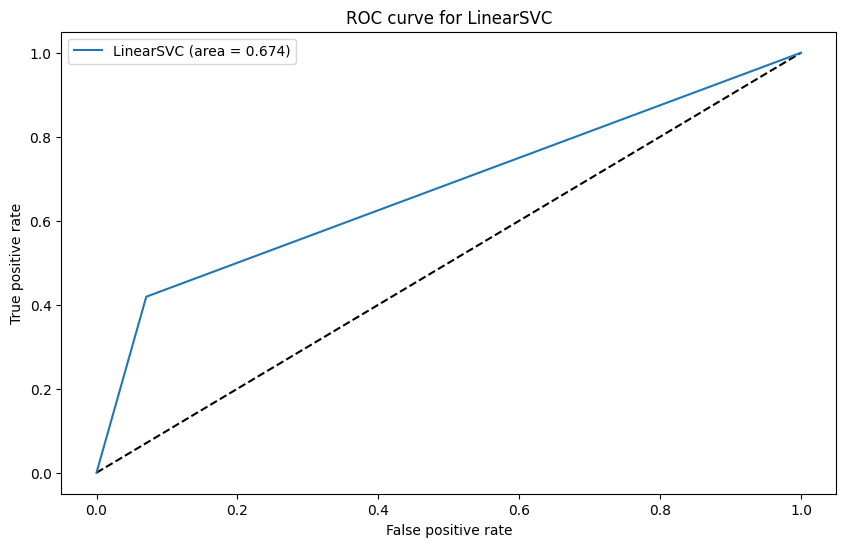

In [65]:
# plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_val)
auc_linear = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='LinearSVC (area = {:.3f})'.format(auc_linear))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for LinearSVC')
plt.legend(loc='best')
plt.show()

####As seen from the evaluation metrics above, the LinearSVC model appears to have:

- Good Accuracy

- Poor Precision (Incorrectly identifies legitimate providers as fraudulent)

- Poor Recall (Unable to correctly identify fraudulent providers well)

- Moderately high ROC-AUC under the curve (Overall, the model is decent at minimizing both False Positives and False Negatives)

In [57]:
# Now we proceed to fit the model to a SVM using the polynomial Kernel
poly_svm = SVC(kernel='poly', random_state=0)

# Fit the data to the SVM
poly_svm.fit(X_train, y_train)

SVC(kernel='poly', random_state=0)

In [58]:
# Make fraud predictions on training set
y_pred_train_poly = poly_svm.predict(X_train)

# Print out the evaluation metrics on the validation set
acc_train_poly = accuracy_score(y_train, y_pred_train_poly)
prec_train_poly = precision_score(y_train, y_pred_train_poly)
recall_train_poly = recall_score(y_train, y_pred_train_poly)
confusion_train_poly = confusion_matrix(y_train, y_pred_train_poly)

print(f"The accuracy of the Polynomial SVM model in predicting fraud on the training set is {acc_train_poly}")
print(f"The precision of the Polynomial SVM model in predicting fraud on the training set is {prec_train_poly}")
print(f"The recall score of the Polynomial SVM model in predicting fraud on the training set is {recall_train_poly}")
print(f"The confusion matrix is as follows: \n")
print(confusion_train_poly)

The accuracy of the Polynomial SVM model in predicting fraud is 0.6411074253636132
The precision of the Polynomial SVM model in predicting fraud is 0.9309262166405023
The recall score of the Polynomial SVM model in predicting fraud is 0.3032472513423677
The confusion matrix is as follows: 

[[3839   88]
 [2725 1186]]


In [68]:
# Make fraud predictions on validation set
y_pred_val_poly = poly_svm.predict(X_val)

# Print out the evaluation metrics on the validation set
acc_val_poly = accuracy_score(y_val, y_pred_val_poly)
prec_val_poly = precision_score(y_val, y_pred_val_poly)
recall_val_poly = recall_score(y_val, y_pred_val_poly)
confusion_val_poly = confusion_matrix(y_val, y_pred_val_poly)

print(f"The accuracy of the Polynomial SVM model in predicting fraud on the validation set is {acc_val_poly}")
print(f"The precision of the Polynomial SVM model in predicting fraud on the validation set is {prec_val_poly}")
print(f"The recall score of the Polynomial SVM model in predicting fraud on the validation set is {recall_val_poly}")
print(f"The confusion matrix is as follows: \n")
print(confusion_val_poly)

The accuracy of the Polynomial SVM model in predicting fraud on the validation set is 0.9168207024029574
The precision of the Polynomial SVM model in predicting fraud on the validation set is 0.6229508196721312
The recall score of the Polynomial SVM model in predicting fraud on the validation set is 0.3619047619047619
The confusion matrix is as follows: 

[[954  23]
 [ 67  38]]


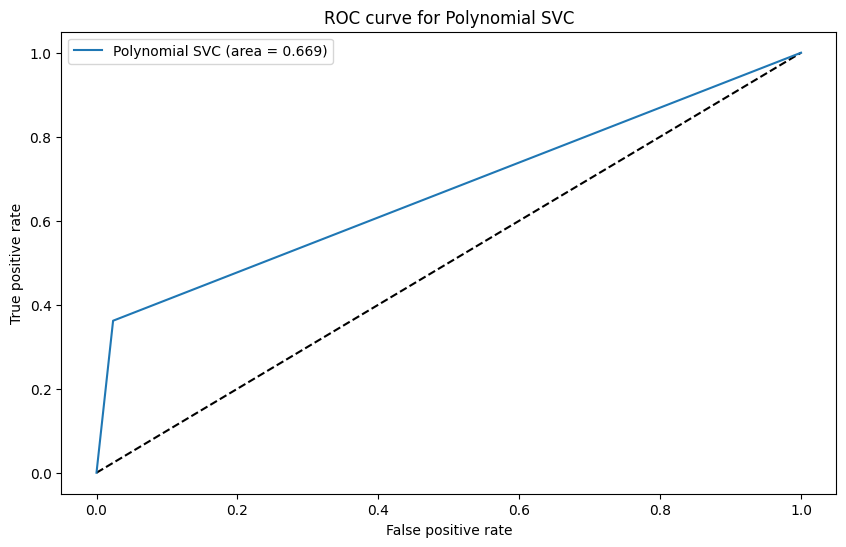

In [71]:
# plot the ROC curve
fpr_poly, tpr_poly, thresholds_poly = roc_curve(y_val, y_pred_val_poly)
auc_poly = auc(fpr_poly, tpr_poly)

plt.figure(figsize=(10, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_poly, tpr_poly, label='Polynomial SVC (area = {:.3f})'.format(auc_poly))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for Polynomial SVC')
plt.legend(loc='best')
plt.show()

####As seen from the evaluation metrics above, the Polynomial SVM model appears to have:

- Very Good Accuracy

- Moderately Good Precision (Correctly identifies legitimate providers as fraudulent)

- Very Poor Recall (Correctly identifies fraudulent providers poorly)

- Moderate ROC-AUC under the curve (Overall, the model is moderately good at minimizing both False Positives and False Negatives)

In [67]:
# Now we proceed to fit the model to a SVM using the Radial Kernel, to capture any possible nesting in the fraudulent cases
rbf_svm = SVC(kernel='rbf', random_state=0)

# Fit the data to the SVM
rbf_svm.fit(X_train, y_train)

SVC(random_state=0)

In [69]:
# Make fraud predictions on training set
y_pred_train_rbf = rbf_svm.predict(X_train)

# Print out the evaluation metrics on the validation set
acc_train_rbf = accuracy_score(y_train, y_pred_train_rbf)
prec_train_rbf = precision_score(y_train, y_pred_train_rbf)
recall_train_rbf = recall_score(y_train, y_pred_train_rbf)
confusion_train_rbf = confusion_matrix(y_train, y_pred_train_rbf)

print(f"The accuracy of the Radial SVM model in predicting fraud on the training set is {acc_train_rbf}")
print(f"The precision of the Radial SVM model in predicting fraud on the training set is {prec_train_rbf}")
print(f"The recall score of the Radial SVM model in predicting fraud on the training set is {recall_train_rbf}")
print(f"The confusion matrix is as follows: \n")
print(confusion_train_rbf)

The accuracy of the Radial SVM model in predicting fraud on the training set is 0.8300586884409288
The precision of the Radial SVM model in predicting fraud on the training set is 0.8503124151045911
The recall score of the Radial SVM model in predicting fraud on the training set is 0.8003068268984914
The confusion matrix is as follows: 

[[3376  551]
 [ 781 3130]]


In [70]:
# Make fraud predictions on validation set
y_pred_val_rbf = rbf_svm.predict(X_val)

# Print out the evaluation metrics on the validation set
acc_val_rbf = accuracy_score(y_val, y_pred_val_rbf)
prec_val_rbf = precision_score(y_val, y_pred_val_rbf)
recall_val_rbf = recall_score(y_val, y_pred_val_rbf)
confusion_val_rbf = confusion_matrix(y_val, y_pred_val_rbf)

print(f"The accuracy of the Radial SVM model in predicting fraud on the validation set is {acc_val_rbf}")
print(f"The precision of the Radial SVM model in predicting fraud on the validation set is {prec_val_rbf}")
print(f"The recall score of the Radial SVM model in predicting fraud on the validation set is {recall_val_rbf}")
print(f"The confusion matrix is as follows: \n")
print(confusion_val_rbf)

The accuracy of the Radial SVM model in predicting fraud on the validation set is 0.8715341959334566
The precision of the Radial SVM model in predicting fraud on the validation set is 0.4174757281553398
The recall score of the Radial SVM model in predicting fraud on the validation set is 0.819047619047619
The confusion matrix is as follows: 

[[857 120]
 [ 19  86]]


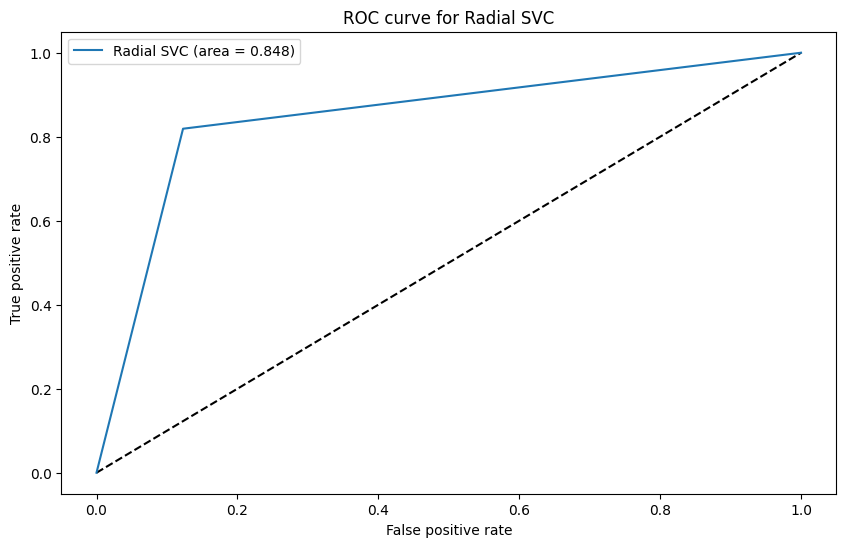

In [72]:
# plot the ROC curve
fpr_rbf, tpr_rbf, thresholds_rbf = roc_curve(y_val, y_pred_val_rbf)
auc_rbf = auc(fpr_rbf, tpr_rbf)

plt.figure(figsize=(10, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rbf, tpr_rbf, label='Radial SVC (area = {:.3f})'.format(auc_rbf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for Radial SVC')
plt.legend(loc='best')
plt.show()

####As seen in the above evaluation metrics for SVM with the Radial Kernel, the model has:

- Very Good Accuracy

- Poor Precision (Incorrectly identifies legitimate providers as fraudulent)

- Very Good Recall (Correctly identifies fraudulent providers)

- Very Good ROC-AUC under the curve (Overall, the model is very good at minimizing both False Positives and False Negatives)

####All in all, the Radial SVC model seems to have the best applicability to the task at hand, due to its good recall.

####Although this model does not as high a precision score, it is more acceptable to have a model that incorrectly flags legitimate providers as fraudulent, than one that fails to identify fraudulent providers

####To boost its performance more, we will now attempt to optimize it with GridSearchCV

In [74]:
# Import required library
from sklearn.model_selection import GridSearchCV

In [75]:
# Initialise the hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'max_iter': [1000, 10000],
    'tol': [1e-3, 1e-4]
}

# fit the model on all permutations of these hyperparameters
grid_search = GridSearchCV(estimator=rbf_svm, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ....................C=0.1, max_iter=1000, tol=0.001; total time=   5.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ....................C=0.1, max_iter=1000, tol=0.001; total time=   4.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ....................C=0.1, max_iter=1000, tol=0.001; total time=   3.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ....................C=0.1, max_iter=1000, tol=0.001; total time=   3.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ....................C=0.1, max_iter=1000, tol=0.001; total time=   3.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ...................C=0.1, max_iter=1000, tol=0.0001; total time=   4.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ...................C=0.1, max_iter=1000, tol=0.0001; total time=   3.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ...................C=0.1, max_iter=1000, tol=0.0001; total time=   3.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ...................C=0.1, max_iter=1000, tol=0.0001; total time=   3.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ...................C=0.1, max_iter=1000, tol=0.0001; total time=   3.7s
[CV] END ...................C=0.1, max_iter=10000, tol=0.001; total time=   8.8s
[CV] END ...................C=0.1, max_iter=10000, tol=0.001; total time=   7.7s
[CV] END ...................C=0.1, max_iter=10000, tol=0.001; total time=   9.2s
[CV] END ...................C=0.1, max_iter=10000, tol=0.001; total time=   7.6s
[CV] END ...................C=0.1, max_iter=10000, tol=0.001; total time=  11.6s
[CV] END ..................C=0.1, max_iter=10000, tol=0.0001; total time=   9.6s
[CV] END ..................C=0.1, max_iter=10000, tol=0.0001; total time=  10.8s
[CV] END ..................C=0.1, max_iter=10000, tol=0.0001; total time=   9.0s
[CV] END ..................C=0.1, max_iter=10000, tol=0.0001; total time=   8.8s
[CV] END ..................C=0.1, max_iter=10000, tol=0.0001; total time=  10.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ......................C=1, max_iter=1000, tol=0.001; total time=   4.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ......................C=1, max_iter=1000, tol=0.001; total time=   3.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ......................C=1, max_iter=1000, tol=0.001; total time=   3.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ......................C=1, max_iter=1000, tol=0.001; total time=   4.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ......................C=1, max_iter=1000, tol=0.001; total time=   5.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .....................C=1, max_iter=1000, tol=0.0001; total time=   3.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .....................C=1, max_iter=1000, tol=0.0001; total time=   4.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .....................C=1, max_iter=1000, tol=0.0001; total time=   5.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .....................C=1, max_iter=1000, tol=0.0001; total time=   5.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .....................C=1, max_iter=1000, tol=0.0001; total time=   4.1s
[CV] END .....................C=1, max_iter=10000, tol=0.001; total time=   6.2s
[CV] END .....................C=1, max_iter=10000, tol=0.001; total time=  11.9s
[CV] END .....................C=1, max_iter=10000, tol=0.001; total time=   8.8s
[CV] END .....................C=1, max_iter=10000, tol=0.001; total time=  10.4s
[CV] END .....................C=1, max_iter=10000, tol=0.001; total time=   8.0s
[CV] END ....................C=1, max_iter=10000, tol=0.0001; total time=   7.5s
[CV] END ....................C=1, max_iter=10000, tol=0.0001; total time=   9.2s
[CV] END ....................C=1, max_iter=10000, tol=0.0001; total time=   9.9s
[CV] END ....................C=1, max_iter=10000, tol=0.0001; total time=   8.2s
[CV] END ....................C=1, max_iter=10000, tol=0.0001; total time=   9.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .....................C=10, max_iter=1000, tol=0.001; total time=   3.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .....................C=10, max_iter=1000, tol=0.001; total time=   3.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .....................C=10, max_iter=1000, tol=0.001; total time=   3.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .....................C=10, max_iter=1000, tol=0.001; total time=   5.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .....................C=10, max_iter=1000, tol=0.001; total time=   5.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ....................C=10, max_iter=1000, tol=0.0001; total time=   3.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ....................C=10, max_iter=1000, tol=0.0001; total time=   3.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ....................C=10, max_iter=1000, tol=0.0001; total time=   5.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ....................C=10, max_iter=1000, tol=0.0001; total time=   5.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ....................C=10, max_iter=1000, tol=0.0001; total time=   4.3s
[CV] END ....................C=10, max_iter=10000, tol=0.001; total time=   3.7s
[CV] END ....................C=10, max_iter=10000, tol=0.001; total time=   8.6s
[CV] END ....................C=10, max_iter=10000, tol=0.001; total time=   7.6s
[CV] END ....................C=10, max_iter=10000, tol=0.001; total time=   8.5s
[CV] END ....................C=10, max_iter=10000, tol=0.001; total time=   5.7s
[CV] END ...................C=10, max_iter=10000, tol=0.0001; total time=   2.8s
[CV] END ...................C=10, max_iter=10000, tol=0.0001; total time=   5.4s
[CV] END ...................C=10, max_iter=10000, tol=0.0001; total time=   7.3s
[CV] END ...................C=10, max_iter=10000, tol=0.0001; total time=   5.4s
[CV] END ...................C=10, max_iter=10000, tol=0.0001; total time=   4.5s


GridSearchCV(cv=5, estimator=SVC(random_state=0),
             param_grid={'C': [0.1, 1, 10], 'max_iter': [1000, 10000],
                         'tol': [0.001, 0.0001]},
             scoring='accuracy', verbose=2)

In [76]:
best_model_svc = grid_search.best_estimator_

# Make predictions on the validation set using this optimized model
y_pred_svc_opt = best_model_svc.predict(X_val)

# Print out the evaluation metrics for this model on the validation set
acc_val_opt = accuracy_score(y_val, y_pred_svc_opt)
prec_val_opt = precision_score(y_val, y_pred_svc_opt)
recall_val_opt = recall_score(y_val, y_pred_svc_opt)
confusion_val_opt = confusion_matrix(y_val, y_pred_svc_opt)

print(f"The accuracy of the optimized Radial SVC model in predicting fraud is {acc_val_opt}")
print(f"The precision of the optimized Radial SVC model in predicting fraud is {prec_val_opt}")
print(f"The recall score of the optimized Radial SVC model in predicting fraud is {recall_val_opt}")
print(f"The confusion matrix is as follows: \n")
print(confusion_val_opt)

The accuracy of the optimized Radial SVC model in predicting fraud is 0.8456561922365989
The precision of the optimized Radial SVC model in predicting fraud is 0.3686440677966102
The recall score of the optimized Radial SVC model in predicting fraud is 0.8285714285714286
The confusion matrix is as follows: 

[[828 149]
 [ 18  87]]


####As seen above, there is not much change to the performance of the Radial SVC model even after optimization

###Now, we build out the RandomForestRegressor model to identify fraudulent providers

In [77]:
# Import the required library
from sklearn.ensemble import RandomForestClassifier

In [78]:
# Initialise the base RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)

# Fit to the training data
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [79]:
# Make predictions on the validation set
y_pred_rfc_train = rfc.predict(X_train)

# Print out the evaluation metrics for this model on the validation set
acc_train_rfc = accuracy_score(y_train, y_pred_rfc_train)
prec_train_rfc = precision_score(y_train, y_pred_rfc_train)
recall_train_rfc = recall_score(y_train, y_pred_rfc_train)
confusion_train_rfc = confusion_matrix(y_train, y_pred_rfc_train)

print(f"The accuracy of the RandomForestClassifier in predicting fraud on the training set is {acc_train_rfc}")
print(f"The precision of the RandomForestClassifier in predicting fraud on the training set is {prec_train_rfc}")
print(f"The recall score of the RandomForestClassifier in predicting fraud on the training set is {recall_train_rfc}")
print(f"The confusion matrix is as follows: \n")
print(confusion_train_rfc)

The accuracy of the RandomForestClassifier in predicting fraud on the training set is 1.0
The precision of the RandomForestClassifier in predicting fraud on the training set is 1.0
The recall score of the RandomForestClassifier in predicting fraud on the training set is 1.0
The confusion matrix is as follows: 

[[3927    0]
 [   0 3911]]


In [80]:
# Make predictions on the validation set
y_pred_rfc_val = rfc.predict(X_val)

# Print out the evaluation metrics for this model on the validation set
acc_val_rfc = accuracy_score(y_val, y_pred_rfc_val)
prec_val_rfc = precision_score(y_val, y_pred_rfc_val)
recall_val_rfc = recall_score(y_val, y_pred_rfc_val)
confusion_val_rfc = confusion_matrix(y_val, y_pred_rfc_val)

print(f"The accuracy of the RandomForestClassifier in predicting fraud on the validation set is {acc_val_rfc}")
print(f"The precision of the RandomForestClassifier in predicting fraud on the validation set is {prec_val_rfc}")
print(f"The recall score of the RandomForestClassifier in predicting fraud on the validation set is {recall_val_rfc}")
print(f"The confusion matrix is as follows: \n")
print(confusion_val_rfc)

The accuracy of the RandomForestClassifier in predicting fraud on the validation set is 0.9279112754158965
The precision of the RandomForestClassifier in predicting fraud on the validation set is 0.6173913043478261
The recall score of the RandomForestClassifier in predicting fraud on the validation set is 0.6761904761904762
The confusion matrix is as follows: 

[[933  44]
 [ 34  71]]


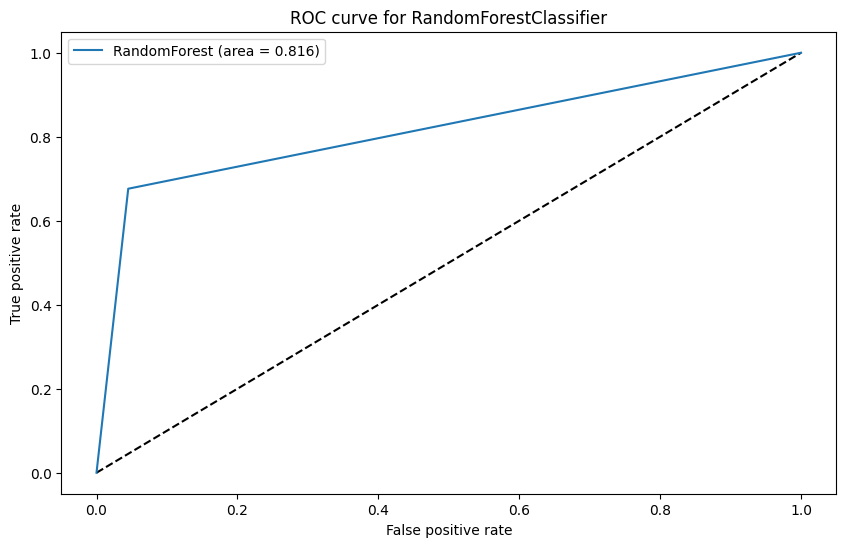

In [81]:
# plot the ROC curve
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_val, y_pred_rfc_val)
auc_rfc = auc(fpr_rfc, tpr_rfc)

plt.figure(figsize=(10, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rfc, tpr_rfc, label='RandomForest (area = {:.3f})'.format(auc_rfc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for RandomForestClassifier')
plt.legend(loc='best')
plt.show()

####As seen from the evaluation metrics above, the model has:

- Very Good Accuracy

- Moderately Good Precision (Correctly identifies legitimate providers as not fraudulent moderately well)

- Moderately Good Recall (Correctly identifies fraudulent providers)

- Very Good ROC-AUC under the curve (Overall, the model is good at minimizing both False Positives and False Negatives)

The model does suffer from a degree of overfitting on the training data, which we will now address

####To boost the performance of the RandomForestClassfier, we attempt to optimize and regularize it with GridSearchCV

In [83]:
# Initialise the hyperparameter grid
param_grid_rfc = {
  'n_estimators': [100, 200],
  'criterion': ['gini', 'entropy'],
  'max_depth': [10, 20, 30],
  'min_samples_split': [2, 10, 20],
  'min_samples_leaf': [1, 2, 4, 8],
  'bootstrap': [True, False]
}

# Fit the GridSearch model
grid_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid_rfc, cv=3, verbose=2, n_jobs=-1)

# run the optimization
grid_rfc.fit(X_train, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30],
                         'min_samples_leaf': [1, 2, 4, 8],
                         'min_samples_split': [2, 10, 20],
                         'n_estimators': [100, 200]},
             verbose=2)

In [85]:
best_model_rfc = grid_rfc.best_estimator_

# make predictions using this new model
y_pred_rfc_opt = best_model_rfc.predict(X_val)

# evaluate the predictions using various metrics
acc_val_rfc_opt = accuracy_score(y_val, y_pred_rfc_opt)
prec_val_rfc_opt = precision_score(y_val, y_pred_rfc_opt)
recall_val_rfc_opt = recall_score(y_val, y_pred_rfc_opt)
confusion_val_rfc_opt = confusion_matrix(y_val, y_pred_rfc_opt)

print(f"The accuracy of the optimized RandomForestClassifier in predicting fraud is {acc_val_rfc_opt}")
print(f"The precision of the optimized RandomForestClassifier in predicting fraud is {prec_val_rfc_opt}")
print(f"The recall score of the optimized RandomForestClassifier in predicting fraud is {recall_val_rfc_opt}")
print(f"The confusion matrix is as follows: \n")
print(confusion_val_rfc_opt)

The accuracy of the optimized RandomForestClassifier in predicting fraud is 0.9269870609981515
The precision of the optimized RandomForestClassifier in predicting fraud is 0.6101694915254238
The recall score of the optimized RandomForestClassifier in predicting fraud is 0.6857142857142857
The confusion matrix is as follows: 

[[931  46]
 [ 33  72]]


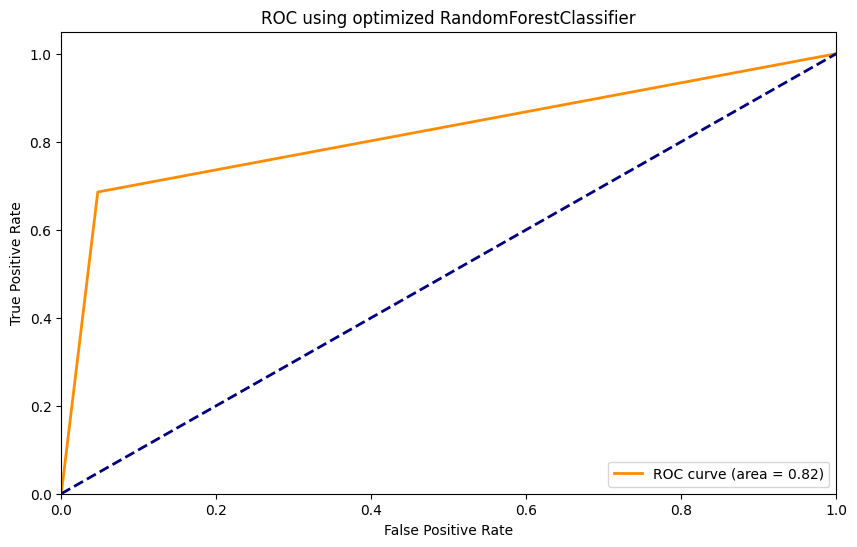

In [86]:
# plot the AUC curve
fpr_rfc_opt, tpr_rfc_opt, _ = roc_curve(y_val, y_pred_rfc_opt)
roc_auc_rfc_opt = auc(fpr_rfc_opt, tpr_rfc_opt)

plt.figure(figsize=(10, 6))
plt.plot(fpr_rfc_opt, tpr_rfc_opt, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_rfc_opt:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC using optimized RandomForestClassifier')
plt.legend(loc="lower right")
plt.show()

####As seen from the evaluation metrics above, the model has:
Very Good Accuracy

Good Precision (Correctly identifies legitimate providers as fraudulent)

Good Recall (Identifies fraudulent providers moderately well)

Good ROC-AUC under the curve (Overall, the model is moderately good at minimizing both False Positives and False Negatives)

###Overall, optimization has marginally improved the performance of the RandomForestClassifier. Hence, we opt for the optimized model

####Checking which features are the most important in this optimized RandomForest model

Text(0.5, 1.0, 'Relative Feature Importance for Optimized RandomForest')

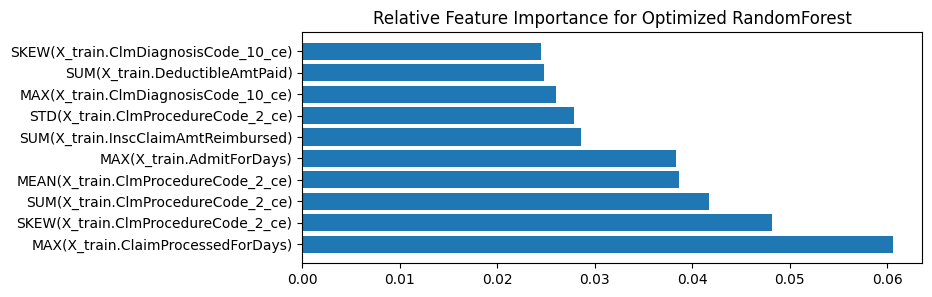

In [93]:
# Plot the feature importance bar chart
plt.figure(figsize=(8,3))
num=10


rfc_importances = best_model_rfc.feature_importances_
order = np.flip(np.argsort(rfc_importances))[0:num]
plt.barh(range(num),
         rfc_importances[order],
         tick_label=X_train.columns[order])
plt.title("Relative Feature Importance for Optimized RandomForest")

In [101]:
# Now we will refit the model with the top 10 most important features, and evaluate the results
top_10_feats = X_train.columns[order]
X_train_imp = X_train[top_10_feats]
X_val_imp = X_val[top_10_feats]

# Refit the model on this new training data
rfc.fit(X_train_imp, y_train)

RandomForestClassifier(random_state=0)

In [103]:
# Make predictions using this new model on the training set
y_pred_rfc_imp_train = rfc.predict(X_train_imp)

# evaluate the predictions using various metrics
acc_val_rfc_imp_train = accuracy_score(y_train, y_pred_rfc_imp_train)
prec_val_rfc_imp_train = precision_score(y_train, y_pred_rfc_imp_train)
recall_val_rfc_imp_train = recall_score(y_train, y_pred_rfc_imp_train)
confusion_val_rfc_imp_train = confusion_matrix(y_train, y_pred_rfc_imp_train)

print(f"The accuracy of the optimized RandomForestClassifier in predicting fraud on the training data is {acc_val_rfc_imp_train}")
print(f"The precision of the optimized RandomForestClassifier in predicting fraud on the training data is {prec_val_rfc_imp_train}")
print(f"The recall score of the optimized RandomForestClassifier in predicting fraud on the training data is {recall_val_rfc_imp_train}")
print(f"The confusion matrix is as follows: \n")
print(confusion_val_rfc_imp_train)

The accuracy of the optimized RandomForestClassifier in predicting fraud on the training data is 0.9998724164327635
The precision of the optimized RandomForestClassifier in predicting fraud on the training data is 1.0
The recall score of the optimized RandomForestClassifier in predicting fraud on the training data is 0.9997443109179238
The confusion matrix is as follows: 

[[3927    0]
 [   1 3910]]


In [104]:
# Make predictions using this new model on the validation set
y_pred_rfc_imp_val = rfc.predict(X_val_imp)

# evaluate the predictions using various metrics
acc_val_rfc_imp_val = accuracy_score(y_val, y_pred_rfc_imp_val)
prec_val_rfc_imp_val = precision_score(y_val, y_pred_rfc_imp_val)
recall_val_rfc_imp_val = recall_score(y_val, y_pred_rfc_imp_val)
confusion_val_rfc_imp_val = confusion_matrix(y_val, y_pred_rfc_imp_val)

print(f"The accuracy of the optimized RandomForestClassifier in predicting fraud on the validation data is {acc_val_rfc_imp_val}")
print(f"The precision of the optimized RandomForestClassifier in predicting fraud on the validation data is {prec_val_rfc_imp_val}")
print(f"The recall score of the optimized RandomForestClassifier in predicting fraud on the validation data is {recall_val_rfc_imp_val}")
print(f"The confusion matrix is as follows: \n")
print(confusion_val_rfc_imp_val)

The accuracy of the optimized RandomForestClassifier in predicting fraud on the validation data is 0.922365988909427
The precision of the optimized RandomForestClassifier in predicting fraud on the validation data is 0.5826771653543307
The recall score of the optimized RandomForestClassifier in predicting fraud on the validation data is 0.7047619047619048
The confusion matrix is as follows: 

[[924  53]
 [ 31  74]]


####From all variants of the RandomForestClassifier, the optimized RandomForest on all the features of X_train seems to be the best performing on the validation set